In [1]:
# Librerias
from datetime import date, datetime
from sqlalchemy import create_engine
import re
import os
import smtplib
import time
import configparser
# Manipulacion y tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import hvplot.pandas
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams["figure.figsize"] = (12, 8)
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

In [2]:
# Sacar las ventas diarias

config = configparser.ConfigParser()
config.read('confi.cfg')

conn_full = f"mssql+pyodbc://{config['Azure']['User']}:{config['Azure']['password']}@{config['Azure']['Database']}/{config['Azure']['Fulfillment']}?driver={config['Azure']['driver']}"

engine = create_engine(conn_full)



query_sales = """
SELECT SalesOrderDate, SUM(TotalSales) as DailySales
FROM [DWH-MaxWarehouse].Fact.Sales
WHERE TotalSales > 0
AND SalesOrderDate >= '2020-01-01'
GROUP BY SalesOrderDate
ORDER BY SalesOrderDate;
"""

sales = pd.read_sql_query(query_sales, engine)


print(sales.head())


AttributeError: 'OptionEngine' object has no attribute 'execute'

In [ ]:
sales.to_excel('Ventas.xlsx', index=False)

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [ ]:
# Modelacion Arima

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Auto Arima

from pmdarima import auto_arima

# Metrica de evaluacion
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [ ]:
# Evaluaciones de Modelos

def evaluacion_metricas(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true-y_pred)/y_true)) *100
    print('Evaluación de las metricas resultados:-')
    print(f'MSE es: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE es: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE es: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE es: {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R^2 es: {metrics.r2_score(y_true, y_pred)}', end = '\n\n')

### Arima

In [ ]:
# Modelacion Arima

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Auto Arima

from pmdarima import auto_arima

# Metrica de evaluacion
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [ ]:
refunds = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
refunds.head()

,Fecha,Amazon,eBay,Shopify,Walmart,Google,Total
0,2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
1,2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2,2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
3,2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
4,2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
refunds.tail(12)

,Fecha,Amazon,eBay,Shopify,Walmart,Google,Total
1390,2023-10-22,2095.71,0.00,0,NaN,NaN,2095.71
1391,2023-10-23,7138.57,0.00,361.98,NaN,NaN,7500.55
1392,2023-10-24,7963.13,0.00,961.69,NaN,7475.83,16400.65
1393,2023-10-25,8128.39,0.00,238.61,NaN,NaN,8367.00
1394,2023-10-26,9595.02,0.00,132.14,NaN,NaN,9727.16
1395,2023-10-27,8380.78,1094.48,504.86,NaN,NaN,9980.12
1396,2023-10-28,3449.65,230.28,340.15,NaN,NaN,4020.08
1397,2023-10-29,1469.72,0.00,0,NaN,NaN,1469.72
1398,2023-10-30,5795.77,381.74,344.1,NaN,NaN,6521.61
1399,2023-10-31,7166.18,295.90,947.32,NaN,8662.23,17071.63


In [ ]:
refunds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    1402 non-null   datetime64[ns]
 1   Amazon   1400 non-null   object        
 2   eBay     1253 non-null   float64       
 3   Shopify  1257 non-null   object        
 4   Walmart  488 non-null    float64       
 5   Google   181 non-null    float64       
 6   Total    1402 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 76.8+ KB


In [ ]:
# Transformacion de la fecha datetime
refunds['Fecha'] = pd.to_datetime(refunds['Fecha'])

In [ ]:
refunds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    1402 non-null   datetime64[ns]
 1   Amazon   1400 non-null   object        
 2   eBay     1253 non-null   float64       
 3   Shopify  1257 non-null   object        
 4   Walmart  488 non-null    float64       
 5   Google   181 non-null    float64       
 6   Total    1402 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 76.8+ KB


In [ ]:
refunds.set_index('Fecha', inplace=True)
refunds.index.freq = 'D'
refunds.head()

,Amazon,eBay,Shopify,Walmart,Google,Total
Fecha,,,,,,
2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
refunds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402 entries, 2020-01-01 to 2023-11-02
Freq: D
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Amazon   1400 non-null   object 
 1   eBay     1253 non-null   float64
 2   Shopify  1257 non-null   object 
 3   Walmart  488 non-null    float64
 4   Google   181 non-null    float64
 5   Total    1402 non-null   float64
dtypes: float64(4), object(2)
memory usage: 76.7+ KB


In [ ]:
fig = px.line(refunds, x=refunds.index, y='Total', template='plotly_dark', title='Refunds a lo largo del tiempo')
fig.show()

count     1402.000000
mean      7907.196586
std       5414.495128
min          0.000000
25%       3824.720000
50%       7100.855000
75%      10414.697500
max      38500.890000
Name: Total, dtype: float64

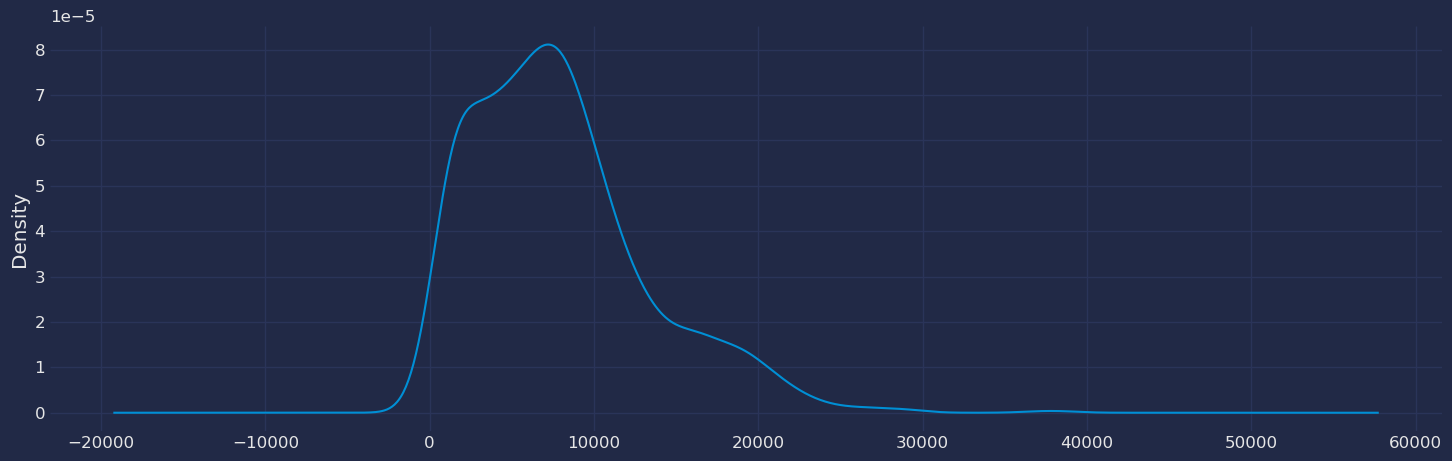

In [ ]:
refunds['Total'].plot(kind= 'kde', figsize = (16,5))
refunds['Total'].describe()

In [ ]:
datos = refunds.copy()

Text(0.5, 0.98, '')

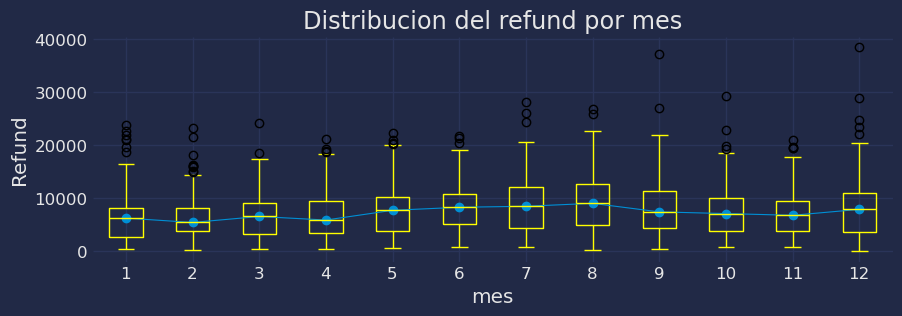

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
datos['mes'] = datos.index.month
datos.boxplot(column='Total', by='mes', ax=ax, color='yellow')
datos.groupby('mes')['Total'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Refund')
ax.set_title('Distribucion del refund por mes')
fig.suptitle('')


Text(0.5, 0.98, '')

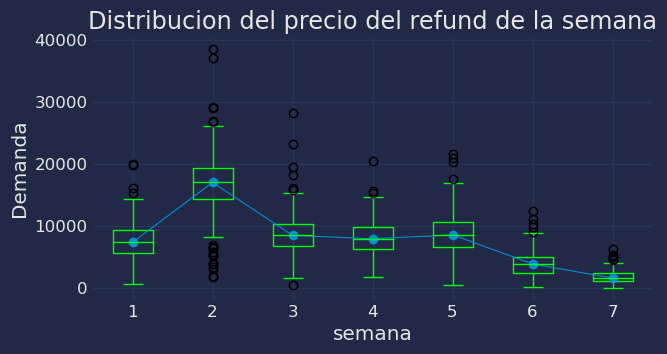

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3.5))
datos['semana'] = datos.index.day_of_week + 1
datos.boxplot(column='Total', by='semana', ax=ax, color='lime')
datos.groupby('semana')['Total'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demanda')
ax.set_title('Distribucion del precio del refund de la semana')
fig.suptitle('')

In [ ]:
#Prueba de Dickey-Fuller Aumentada
from statsmodels.tsa.stattools import adfuller
from numpy import log

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [ ]:
Augmented_Dickey_Fuller_Test_func(refunds['Total'], 'Total')

Resultados de la prueba de Dickey-Fuller para columna: Total
Test Statistic                          -3.899441
p-value                                  0.002039
No Lags Used                            20.000000
Número de observaciones utilizadas    1381.000000
Critical Value (1%)                     -3.435094
Critical Value (5%)                     -2.863635
Critical Value (10%)                    -2.567885
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [ ]:
#Transformacion de los datos a datos a estacionarios

df_1 = refunds.copy()

df_1['Total_diff'] = refunds['Total'].diff()

# removiendo los datos nulos

df_1.dropna(inplace = True)

df_1.head()

,Amazon,eBay,Shopify,Walmart,Google,Total,Total_diff
Fecha,,,,,,,
2020-05-05,4017.8,573.72,195.22,20.45,8524.87,13332.06,9216.02
2020-05-12,4797.13,575.81,995.41,0.00,11301.36,17669.71,10024.88
2020-05-19,4413.91,634.61,1000.36,0.00,9305.64,15354.52,7330.15
2020-05-26,3662.66,849.60,1138.44,0.00,11319.54,16970.24,14942.93
2020-06-02,6719.36,845.51,1209.04,0.00,12492.05,21265.96,12577.65


In [ ]:
Augmented_Dickey_Fuller_Test_func(df_1['Total_diff'], 'Total_diff')

Resultados de la prueba de Dickey-Fuller para columna: Total_diff
Test Statistic                        -4.262666
p-value                                0.000515
No Lags Used                           0.000000
Número de observaciones utilizadas    71.000000
Critical Value (1%)                   -3.526005
Critical Value (5%)                   -2.903200
Critical Value (10%)                  -2.588995
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [ ]:
fig = px.line(df_1, x=df_1.index, y='Total', template='plotly_dark', title='Refunds a lo largo del tiempo')
fig.show()

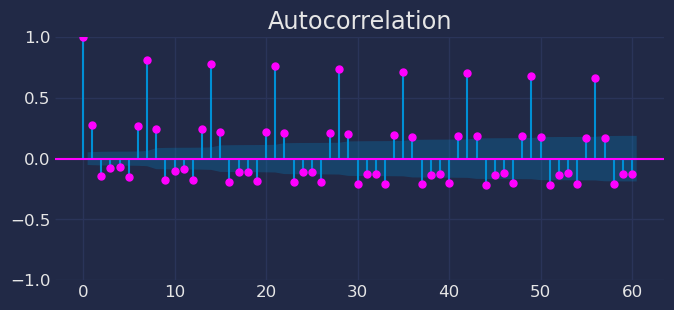

In [ ]:
# Grafica de Autocorelacion

fig, ax = plt.subplots(figsize = (7,3))
plot_acf(refunds['Total'], ax = ax, lags = 60, color = 'fuchsia')
plt.show()

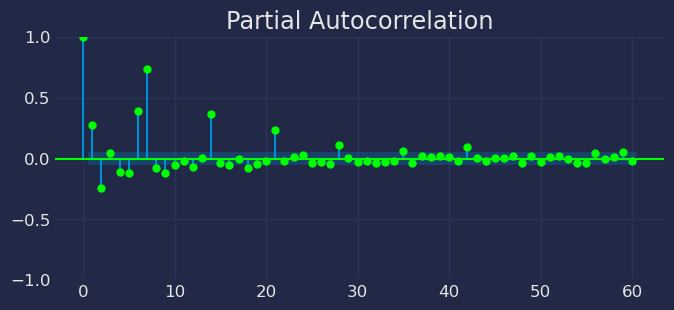

In [ ]:
fig, ax = plt.subplots(figsize = (7,3))
plot_pacf(refunds['Total'], ax = ax, lags = 60, color = 'lime')
plt.show()

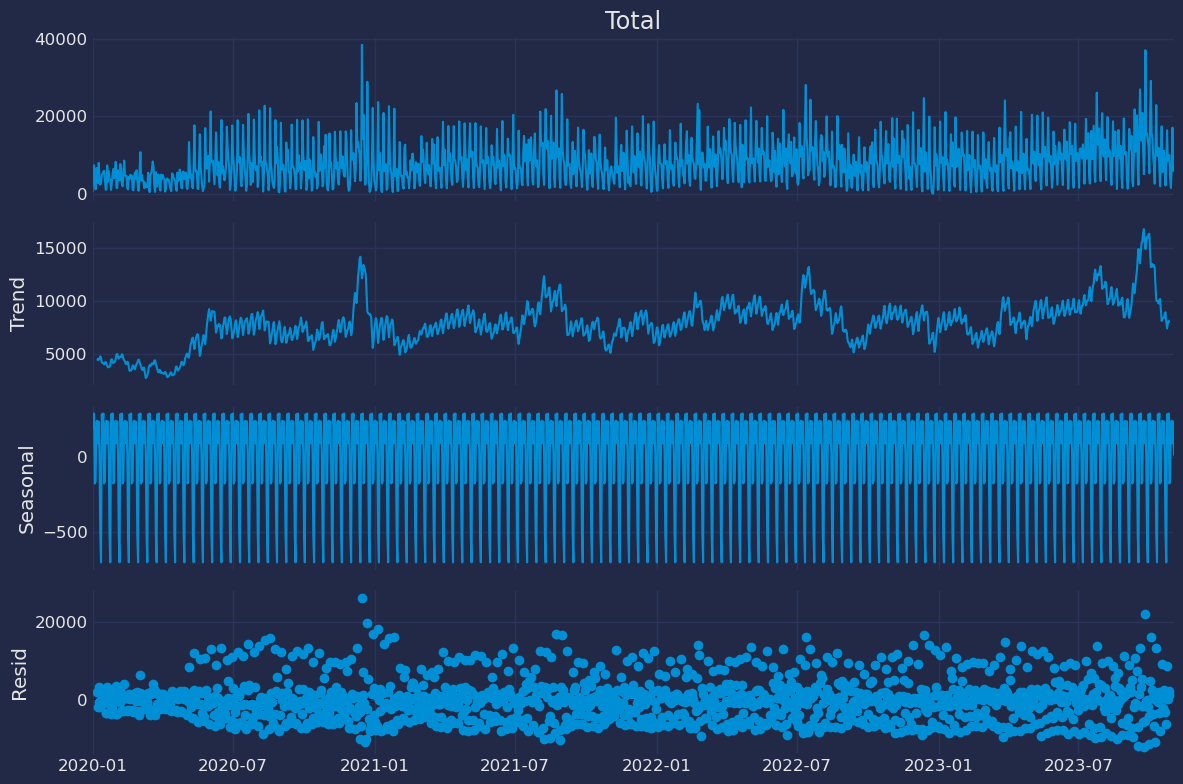

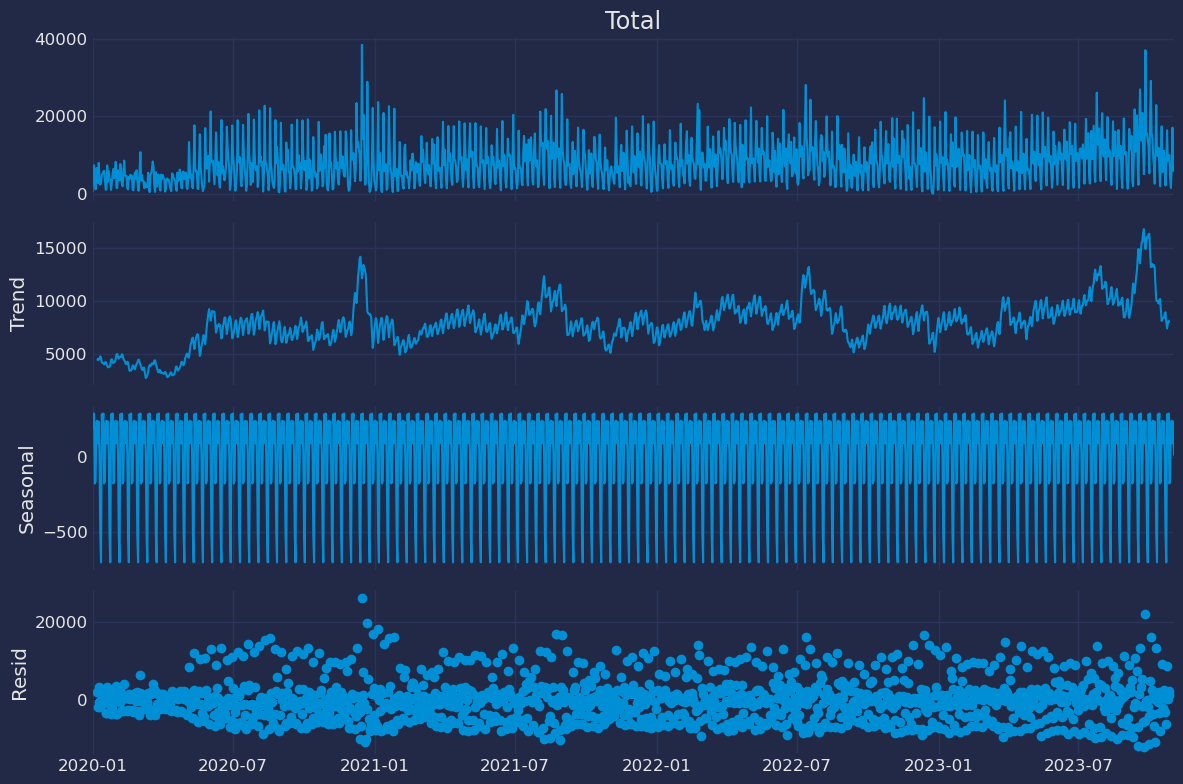

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
a = seasonal_decompose(refunds['Total'], model='add',period = 12)
a.plot()

<Axes: xlabel='Fecha'>

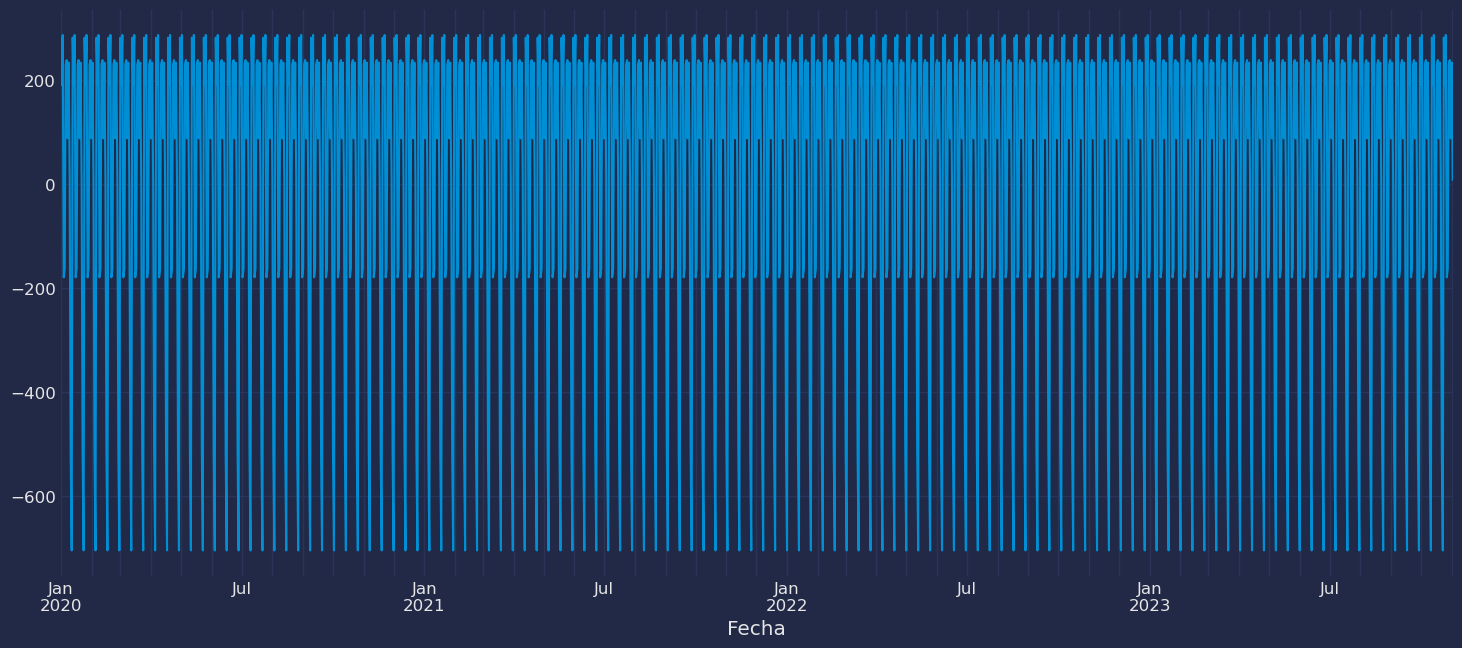

In [ ]:
plt.figure(figsize=(16,7))
a.seasonal.plot()

In [ ]:
#Division de los datos de entrenamiento y prueba

train_data = refunds[:len(refunds) -16]
test_data = refunds[len(refunds)-16:]
test = test_data.copy()
train_data.shape, test_data.shape

((1386, 6), (16, 6))

In [ ]:
train_data.head()

,Amazon,eBay,Shopify,Walmart,Google,Total
Fecha,,,,,,
2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
train_data.drop(['Amazon', 'eBay', 'Shopify','Walmart', 'Google'], axis=1, inplace=True)
train_data.head()

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\1319972633.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total
Fecha,
2020-01-01,421.27
2020-01-02,5546.81
2020-01-03,7327.57
2020-01-04,2726.78
2020-01-05,1101.16


In [ ]:
test_data.head()

,Amazon,eBay,Shopify,Walmart,Google,Total
Fecha,,,,,,
2023-10-18,5175.8,91.46,256.63,NaN,NaN,5523.89
2023-10-19,6042.78,68.03,334.11,NaN,NaN,6444.92
2023-10-20,10315.39,230.42,528.39,NaN,NaN,11074.20
2023-10-21,5396.52,21.63,280.14,NaN,NaN,5698.29
2023-10-22,2095.71,0.00,0,NaN,NaN,2095.71


In [ ]:
test_data.drop(['Amazon', 'eBay', 'Shopify','Walmart', 'Google'], axis=1, inplace=True)
test_data.head()

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\3308773436.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total
Fecha,
2023-10-18,5523.89
2023-10-19,6444.92
2023-10-20,11074.20
2023-10-21,5698.29
2023-10-22,2095.71


In [ ]:
# Modelo de Auto_Arima

modelo_auto_arima = auto_arima(train_data, start_P=0, d=1, start_q=0,
                                max_p=4, max_d=2, max_q=4,
                                D=1, start_Q=0, max_P=2, max_D=1,
                                max_Q=2, m=7, seasonal=True, error_action='warn', trace=True,
                                supress_warnings=True, stepwise=True, random_state=20, n_fits=50)
print(modelo_auto_arima)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,1,0)[7]             : AIC=26515.558, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=27022.343, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=26333.343, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=25710.700, Time=0.83 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=25703.510, Time=2.49 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=25991.745, Time=0.85 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=25700.666, Time=3.17 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=25855.428, Time=1.67 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=inf, Time=4.79 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=3.34 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=26366.370, Time=0.77 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=25688.072, Time=3.67 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=25691.119, Time=1.60 sec
 ARIMA(1,1,1)(2,1,0)[7]             :

In [ ]:
print(modelo_auto_arima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1386
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 7)   Log Likelihood              -12838.036
Date:                           Tue, 07 Nov 2023   AIC                          25688.072
Time:                                   22:50:14   BIC                          25719.442
Sample:                               01-01-2020   HQIC                         25699.808
                                    - 10-17-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1375      0.022      6.180      0.000       0.094       0.181
ma.L1         -0.9319      0.010    -94.140

In [ ]:
predicciones = modelo_auto_arima.predict(start=len(train_data), end=len(refunds['Total']) - 1, typ='levels')


### Implementacion del modelo Sarimax

In [ ]:
arima_model = SARIMAX(train_data['Total'], order =(1,1,1), seasonal_order=(2,1,1,7)).fit()

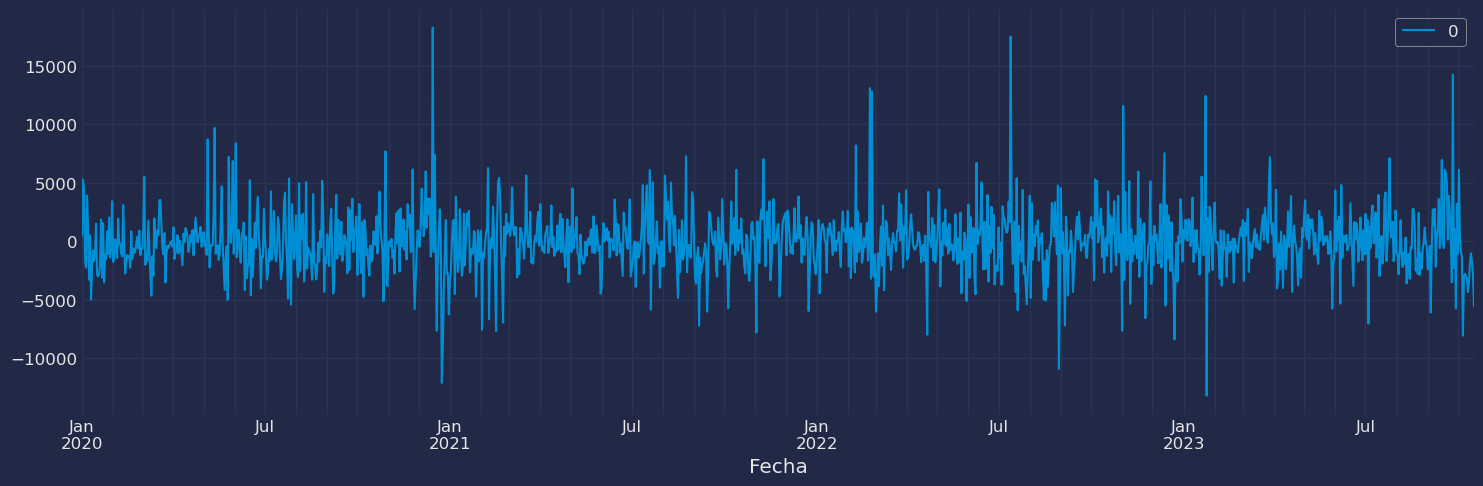

In [ ]:
residuals = pd.DataFrame(arima_model.resid)
residuals.plot(figsize = (16,5));
plt.show();

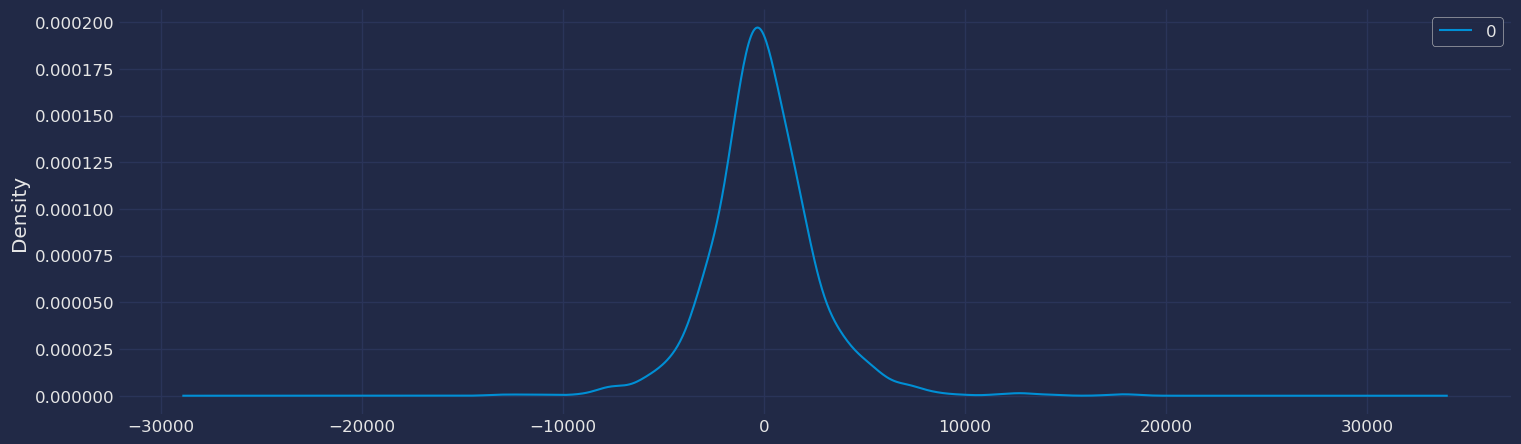

                  0
count   1386.000000
mean     -25.275220
std     2691.376909
min   -13197.261231
25%    -1403.291732
50%     -151.127793
75%     1281.041279
max    18286.111999


In [ ]:
residuals.plot(kind = 'kde', figsize = (16,5))
plt.show()
print(residuals.describe())

### Intepretacion de las graficas de residuos del modelo Arima

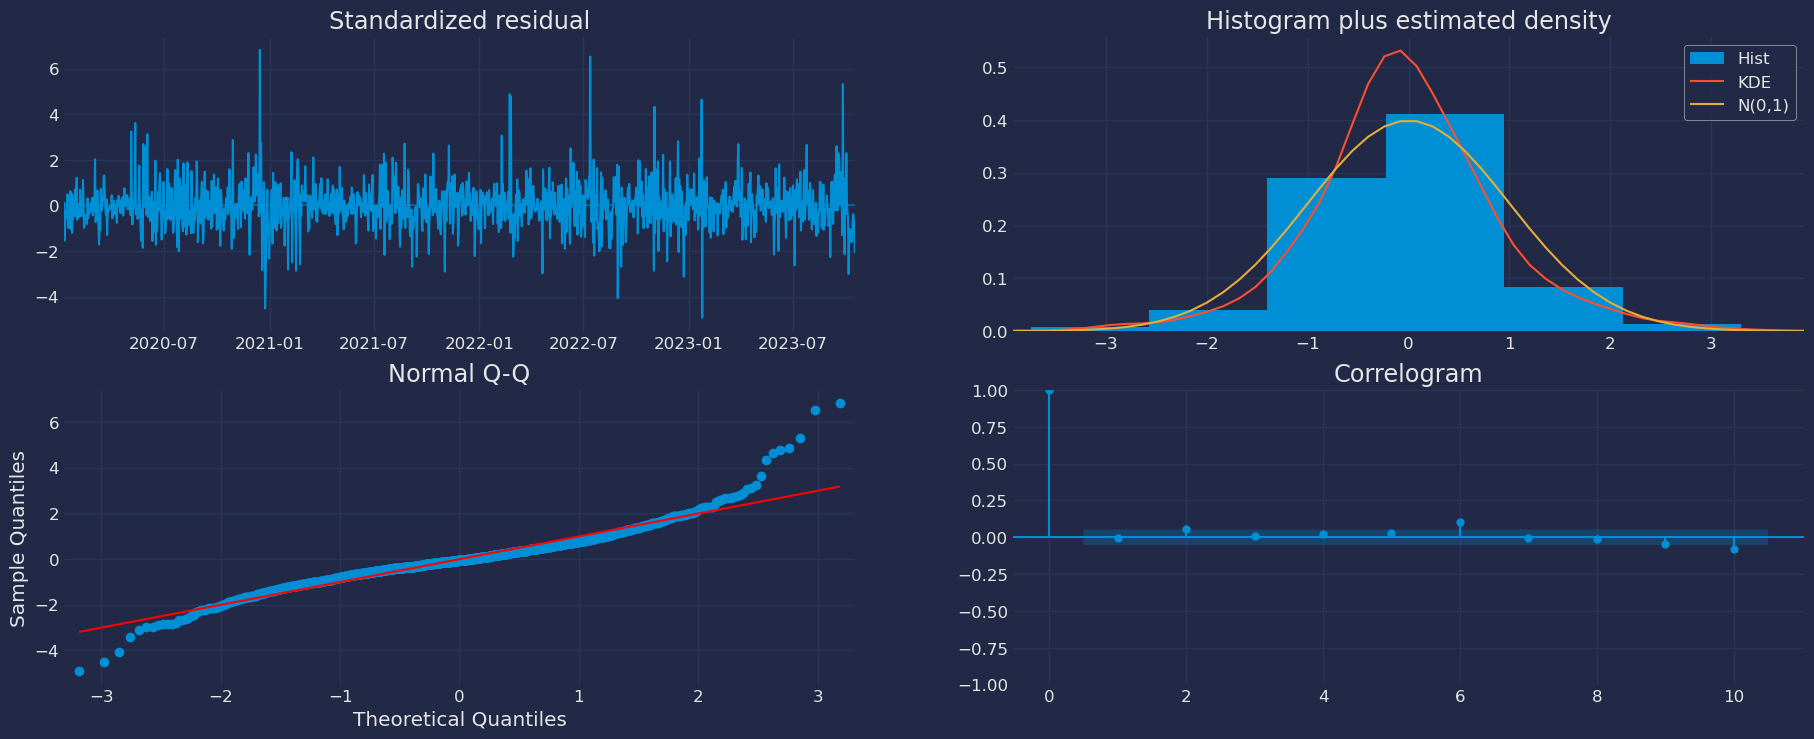

In [ ]:
modelo_auto_arima.plot_diagnostics(figsize=(20,8))
plt.show()

In [ ]:
len(train_data)

1386

In [ ]:
len(refunds['Total'])-1

1401

In [ ]:
arima_pred = arima_model.predict(start=len(train_data), end = len(refunds['Total'])-1, typ = 'levels')
arima_pred = arima_pred.abs()
arima_pred

c:\Users\javij\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



2023-10-18    11197.635723
2023-10-19    11398.901300
2023-10-20    13142.574433
2023-10-21     7036.645085
2023-10-22     2664.951748
2023-10-23    11199.020496
2023-10-24    21206.017186
2023-10-25    11691.645780
2023-10-26    11447.634387
2023-10-27    13524.338058
2023-10-28     7079.581861
2023-10-29     2759.142064
2023-10-30    11294.401864
2023-10-31    21403.527495
2023-11-01    11884.634124
2023-11-02    11603.398119
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
arima_pred2 = arima_model.predict(start = '2023-09-01', end='2023-12-01', typ = 'levels')
arima_pred2 = arima_pred2.abs()
arima_pred2

2023-09-01    13110.286044
2023-09-02     5630.620523
2023-09-03     1606.999067
2023-09-04    10015.827442
2023-09-05    17152.249148
                  ...     
2023-11-27    11569.309763
2023-11-28    21931.551348
2023-11-29    12111.258493
2023-11-30    11779.003968
2023-12-01    13910.451276
Freq: D, Name: predicted_mean, Length: 92, dtype: float64

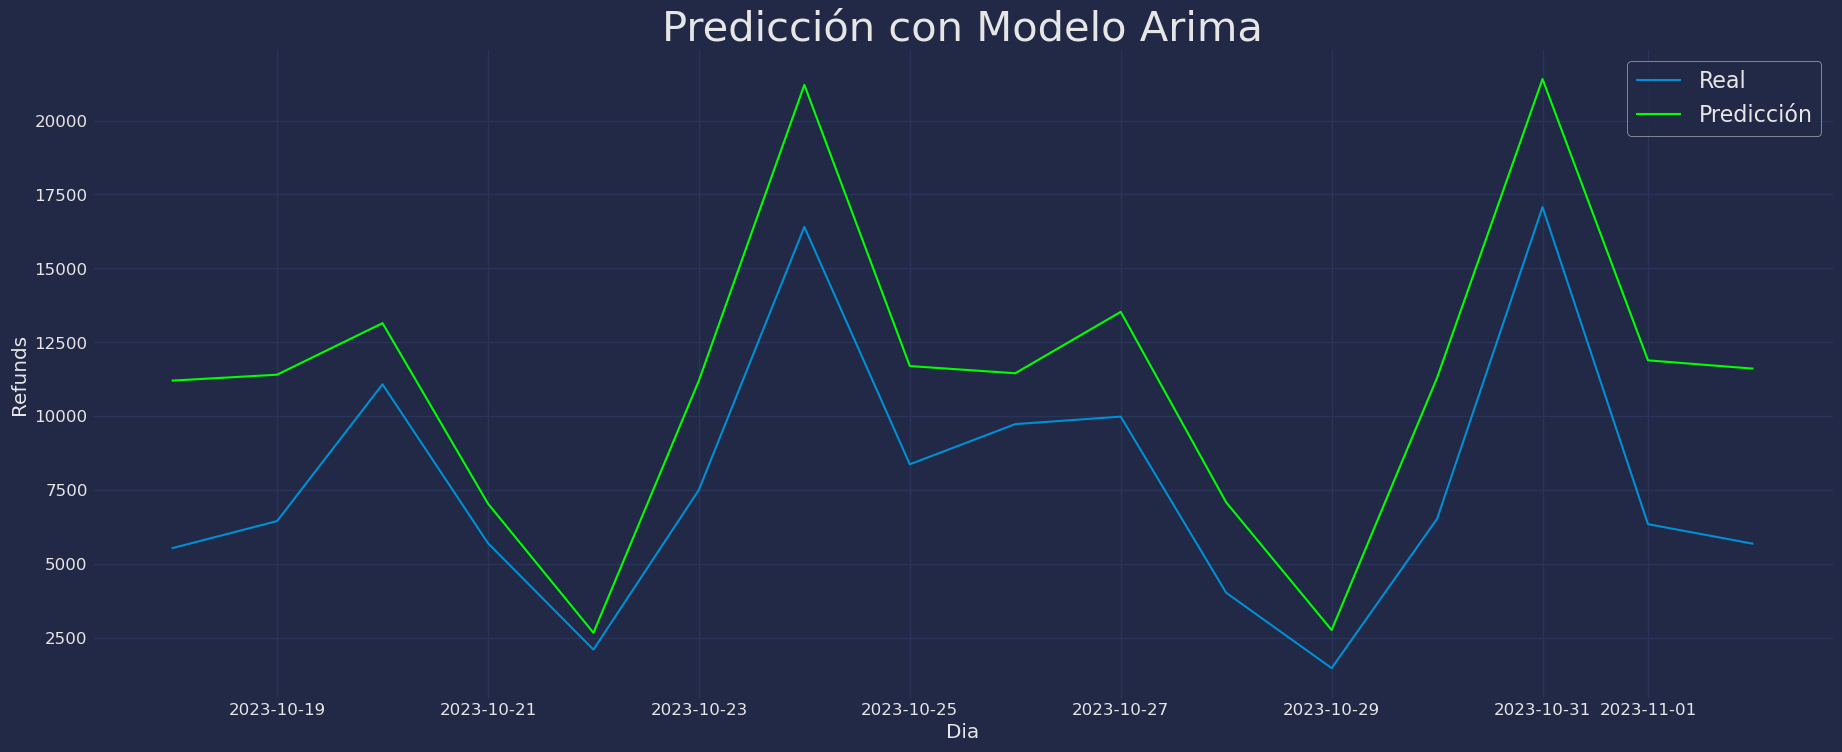

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(test_data['Total'],label='Real')
plt.plot(arima_pred,color='lime', label = 'Predicción')
plt.title('Predicción con Modelo Arima', fontsize = 30)
plt.xlabel('Dia')
plt.ylabel('Refunds')
plt.legend(fontsize = 16)
plt.show()

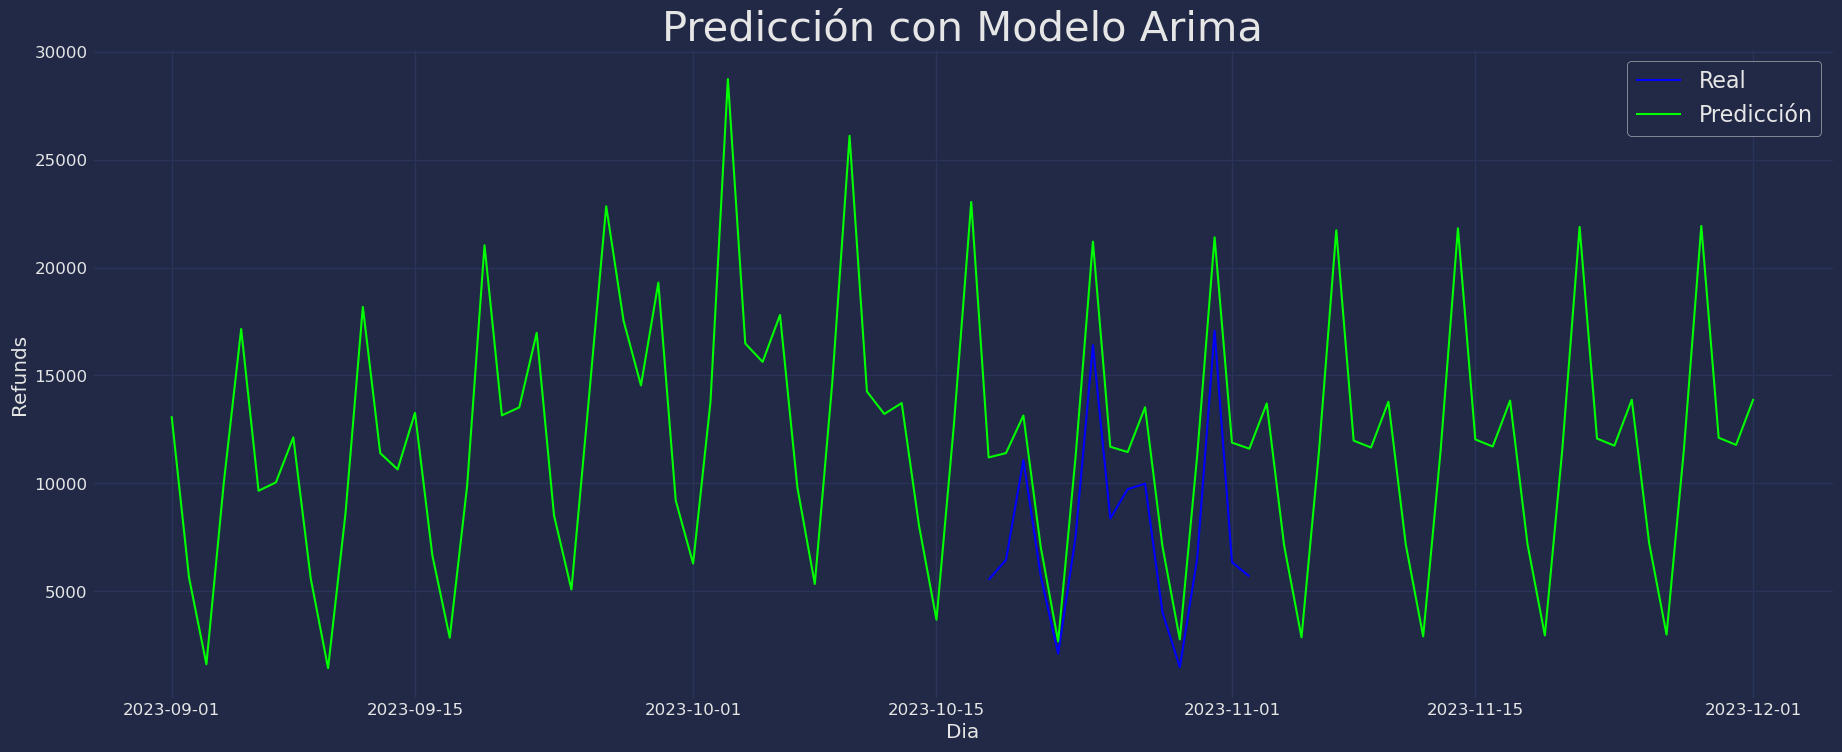

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(test_data['Total'],label='Real', color ='blue')
plt.plot(arima_pred2,color='lime', label = 'Predicción')
plt.title('Predicción con Modelo Arima', fontsize = 30)
plt.xlabel('Dia')
plt.ylabel('Refunds')
plt.legend(fontsize = 16)
plt.show()

In [ ]:
evaluacion_metricas(test_data['Total'],arima_pred)

Evaluación de las metricas resultados:-
MSE es: 15305936.666215487
MAE es: 3538.788107824748
RMSE es: 3912.2802387118804
MAPE es: 54.66685284223585
R^2 es: 0.14398553633498157



In [ ]:
test_data['Arima_Predictions'] = arima_pred
test_data

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\2811964639.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total,Arima_Predictions
Fecha,,
2023-10-18,5523.89,11197.635723
2023-10-19,6444.92,11398.901300
2023-10-20,11074.20,13142.574433
2023-10-21,5698.29,7036.645085
2023-10-22,2095.71,2664.951748
2023-10-23,7500.55,11199.020496
2023-10-24,16400.65,21206.017186
2023-10-25,8367.00,11691.645780
2023-10-26,9727.16,11447.634387


### Red Neuronal LSTM

In [ ]:
refunds = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
refunds.head()

,Fecha,Amazon,eBay,Shopify,Walmart,Google,Total
0,2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
1,2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2,2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
3,2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
4,2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
refunds['Fecha'] = pd.to_datetime(refunds['Fecha'])
refunds.set_index('Fecha', inplace=True)
refunds.index.freq = 'D'
refunds.head()

,Amazon,eBay,Shopify,Walmart,Google,Total
Fecha,,,,,,
2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
#Division de los datos de entrenamiento y prueba

train_data = refunds[:len(refunds) -16]
test_data = refunds[len(refunds)-16:]
test = test_data.copy()
train_data.shape, test_data.shape

((1386, 6), (16, 6))

In [ ]:
test_data = refunds[len(refunds)-16:]
test = test_data.copy()
test_data.drop(['Amazon', 'eBay', 'Shopify','Walmart', 'Google'], axis=1, inplace=True)
test_data.head()


C:\Users\javij\AppData\Local\Temp\ipykernel_51756\353235908.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total
Fecha,
2023-10-18,5523.89
2023-10-19,6444.92
2023-10-20,11074.20
2023-10-21,5698.29
2023-10-22,2095.71


In [ ]:
train = train_data.copy()
train_data.drop(['Amazon', 'eBay', 'Shopify','Walmart', 'Google'], axis=1, inplace=True)

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\3045606791.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(train_data)
scaled_train_data = scaler.transform(train_data)

scaled_test_data = scaler.transform(test_data)

In [ ]:
scaled_test_data.shape

(16, 1)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input= 16
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
generator

### Modelo de Red

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

NameError: name 'n_input' is not defined

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model.fit_generator(generator, epochs=100, callbacks=[early_stopping])


C:\Users\javij\AppData\Local\Temp\ipykernel_51756\548996544.py:5: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/100
1370/1370 [==============================] - 7s 4ms/step - loss: 0.0213
Epoch 2/100
1370/1370 [==============================] - 17s 13ms/step - loss: 0.0205
Epoch 3/100
1370/1370 [==============================] - 17s 13ms/step - loss: 0.0202
Epoch 4/100
1370/1370 [==============================] - 18s 13ms/step - loss: 0.0202
Epoch 5/100
1370/1370 [==============================] - 18s 13ms/step - loss: 0.0199
Epoch 6/100
1370/1370 [==============================] - 17s 13ms/step - loss: 0.0198
Epoch 7/100
1370/1370 [==============================] - 17s 12ms/step - loss: 0.0194
Epoch 8/100
1370/1370 [==============================] - 18s 13ms/step - loss: 0.0189
Epoch 9/100
1370/1370 [==============================] - 18s 13ms/step - loss: 0.0183
Epoch 10/100
1370/1370 [==============================] - 18s 13ms/step - loss: 0.0174
Epoch 11/100
1370/1370 [==============================] - 17s 13ms/step - loss: 0.0163
Epoch 12/100
1370/1370 [==============================

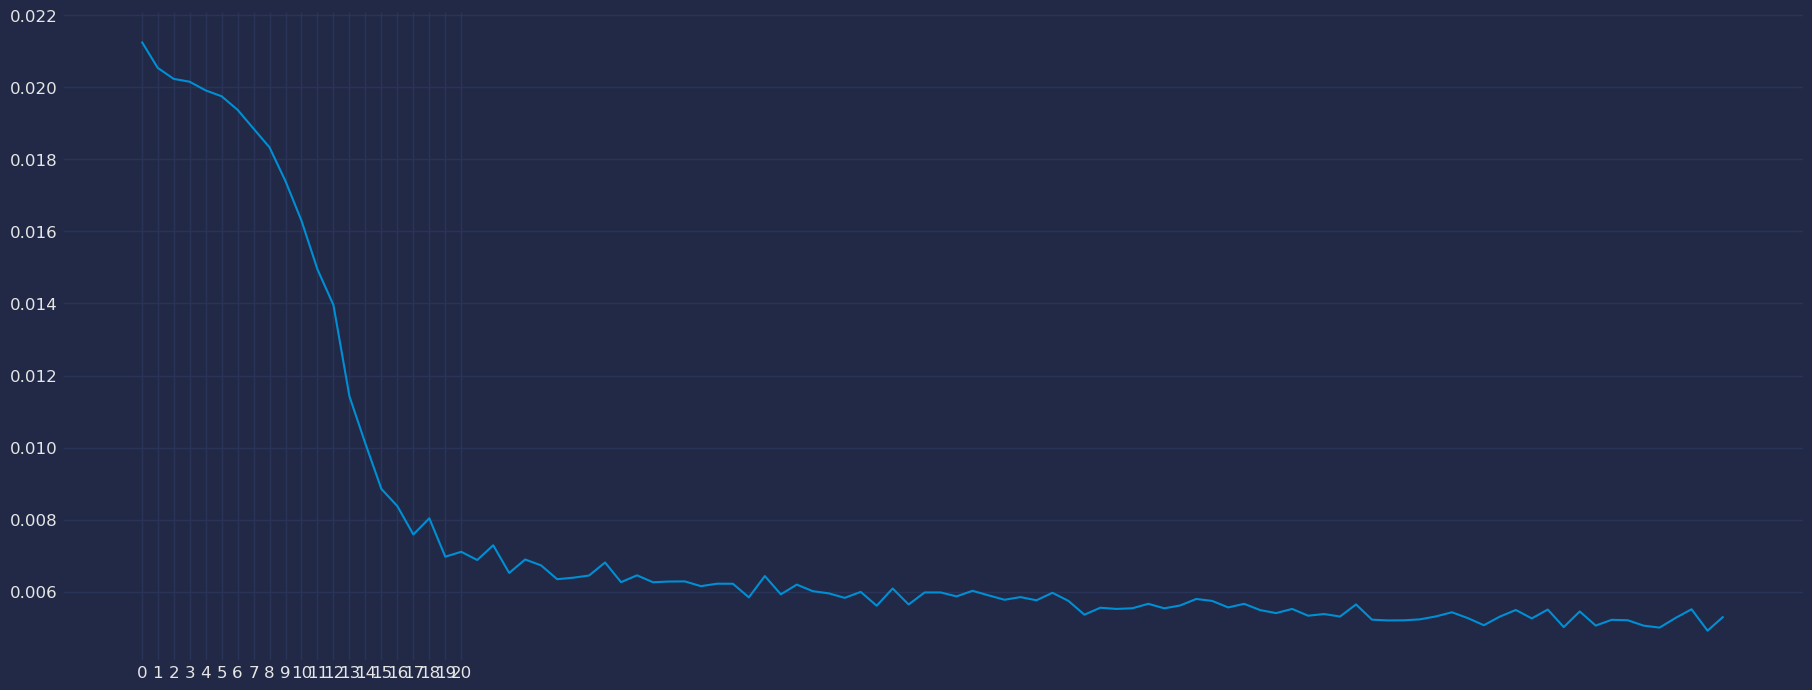

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_test_data
current_batch = batch.reshape((1,n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:], [[lstm_pred]], axis = 1)

1/1 [==============================] - 0s 15ms/step


In [ ]:
lstm_predictions_scaled

[array([0.20132114], dtype=float32),
 array([0.09949479], dtype=float32),
 array([0.04690653], dtype=float32),
 array([0.16996256], dtype=float32),
 array([0.445772], dtype=float32),
 array([0.22379592], dtype=float32),
 array([0.20823576], dtype=float32),
 array([0.21191524], dtype=float32),
 array([0.1048836], dtype=float32),
 array([0.05427361], dtype=float32),
 array([0.19033617], dtype=float32),
 array([0.4521947], dtype=float32),
 array([0.23577848], dtype=float32),
 array([0.21740402], dtype=float32),
 array([0.21148047], dtype=float32),
 array([0.10958283], dtype=float32)]

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [ ]:
lstm_predictions.shape

(16, 1)

In [ ]:
lstm_predictions

array([[ 7751.04306318],
       [ 3830.63777557],
       [ 1805.94318481],
       [ 6543.70964072],
       [17162.61843703],
       [ 8616.34212187],
       [ 8017.26191899],
       [ 8158.9253327 ],
       [ 4038.11209085],
       [ 2089.58210936],
       [ 7328.11185996],
       [17409.89804539],
       [ 9077.68135242],
       [ 8370.24836787],
       [ 8142.18625531],
       [ 4219.03663563]])

In [ ]:
test_data['Arima_Predictions'] = arima_pred
test_data['LSTM_Predictions'] = lstm_predictions

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\2426210400.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\2426210400.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_data

,Total,Arima_Predictions,LSTM_Predictions
Fecha,,,
2023-10-18,5523.89,11197.635723,7751.043063
2023-10-19,6444.92,11398.901300,3830.637776
2023-10-20,11074.20,13142.574433,1805.943185
2023-10-21,5698.29,7036.645085,6543.709641
2023-10-22,2095.71,2664.951748,17162.618437
2023-10-23,7500.55,11199.020496,8616.342122
2023-10-24,16400.65,21206.017186,8017.261919
2023-10-25,8367.00,11691.645780,8158.925333
2023-10-26,9727.16,11447.634387,4038.112091


In [ ]:
ai = test_data[['Total','LSTM_Predictions']]
fig = px.line(ai, x= test_data.index, y = ai.columns, title = 'Prediccion del modelo LSTM', template = 'plotly_dark')
fig.show()

In [ ]:
evaluacion_metricas(test_data['Total'], test_data['LSTM_Predictions'])

Evaluación de las metricas resultados:-
MSE es: 52766631.705898285
MAE es: 5442.088960007532
RMSE es: 7264.064406783456
MAPE es: 150.96790918370613
R^2 es: -1.951077148962388



### Random Forest Modelo

In [ ]:
refunds2 = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
refunds2.head()

,Fecha,Amazon,eBay,Shopify,Walmart,Google,Total
0,2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
1,2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2,2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
3,2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
4,2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
from pmdarima.utils import diff
from pmdarima.utils import array
from pmdarima.utils import diff_inv

refunds2['diff'] = refunds2['Total'].diff()
refunds2.head()

,Fecha,Amazon,eBay,Shopify,Walmart,Google,Total,diff
0,2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27,NaN
1,2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81,5125.54
2,2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57,1780.76
3,2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78,-4600.79
4,2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16,-1625.62


In [ ]:
refunds2['diff'].describe()

count     1401.000000
mean         3.751292
std       6500.313952
min     -24364.890000
25%      -4080.180000
50%       -613.590000
75%       4178.530000
max      31794.220000
Name: diff, dtype: float64

In [ ]:
refunds2.columns

Index(['Fecha', 'Amazon', 'eBay', 'Shopify', 'Walmart', 'Google', 'Total',
       'diff'],
      dtype='object')

In [ ]:
fig = px.line(refunds2, x ='Fecha', y ='diff', template='plotly_dark', title='Datos diferenciados')
fig.show()

<Axes: ylabel='Density'>

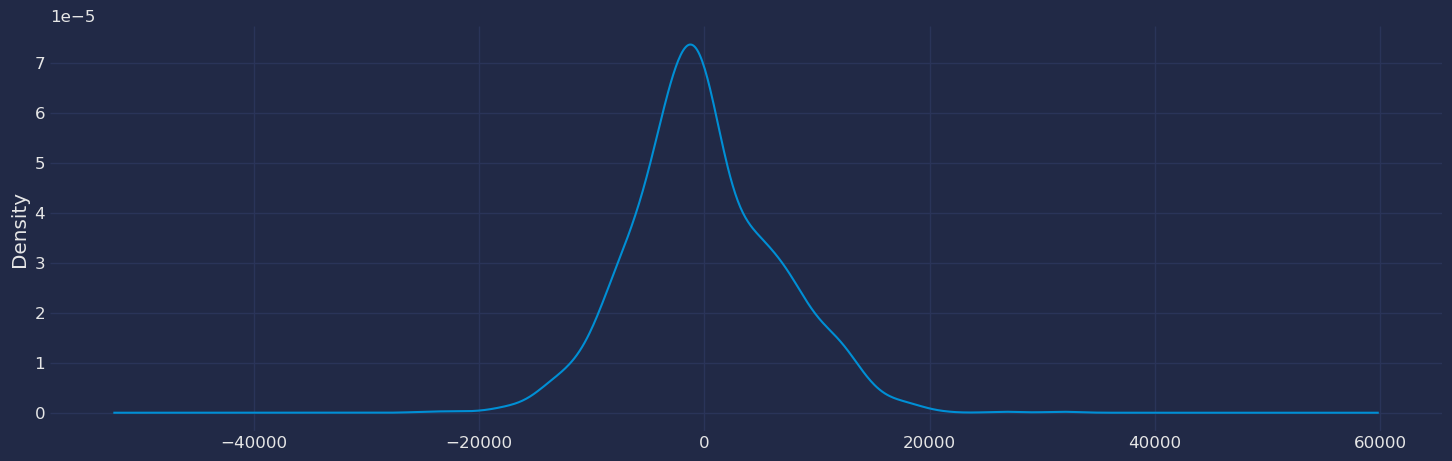

In [ ]:
refunds2['diff'].plot(kind='kde', figsize=(16,5))

In [ ]:
refunds2['Fecha'] = pd.to_datetime(refunds2['Fecha'])
refunds2 = refunds2.set_index('Fecha')

def create_feature(df):
    df = df.copy()  

    df['Año'] = df.index.year
    df['Mes'] = df.index.month
    df['Dia'] = df.index.day
    df['Dia_de_la_Semana'] = df.index.dayofweek
    df['Trimestre'] = df.index.quarter
    df['semana_del_año'] = df.index.isocalendar().week
    df['Dia_del_año'] = df.index.dayofyear
    return df
refunds2 = create_feature(refunds2)

Text(0.5, 1.0, 'Distribuccion de los refunds diarios')

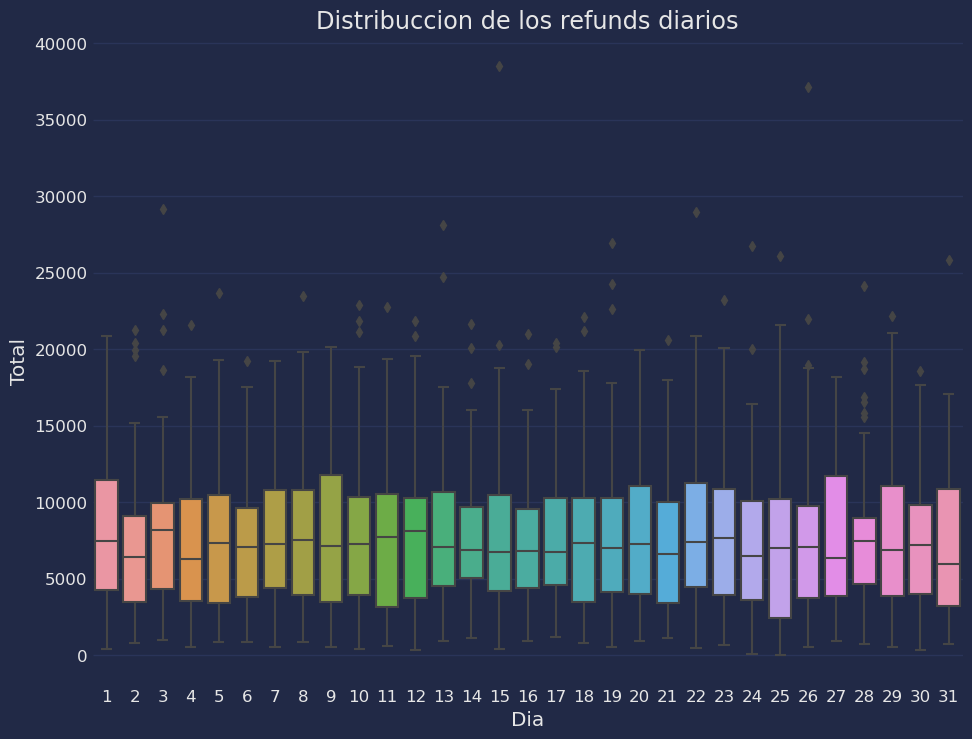

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = refunds2, x = 'Dia', y = 'Total')
ax.set_title('Distribuccion de los refunds diarios')


Text(0.5, 1.0, 'Distribuccion de los refunds mensuales')

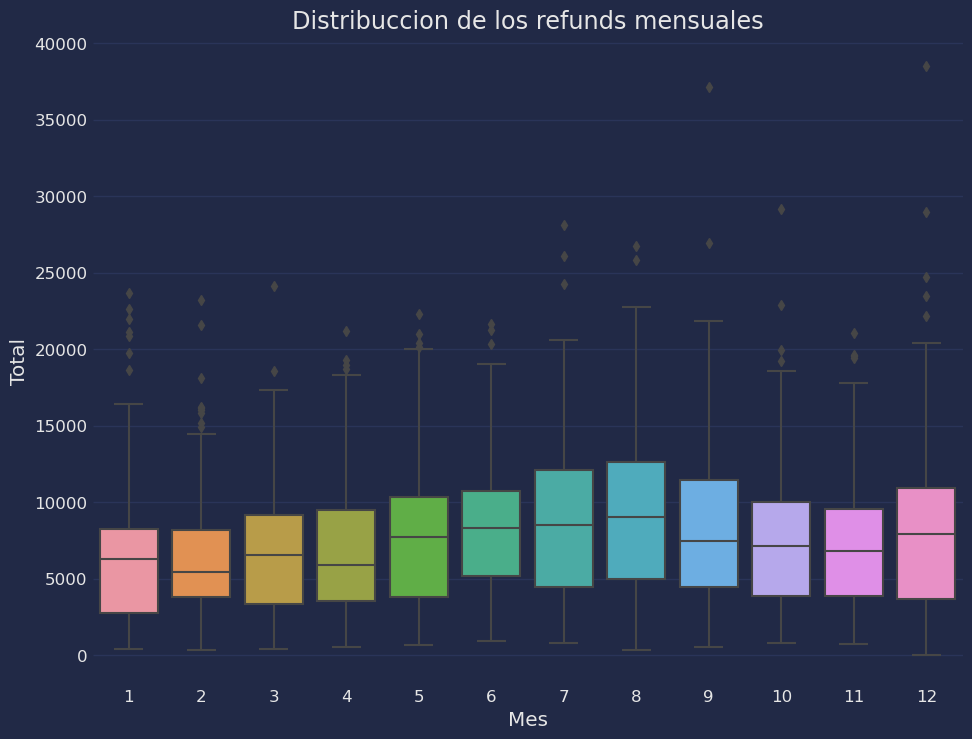

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = refunds2, x = 'Mes', y = 'Total')
ax.set_title('Distribuccion de los refunds mensuales')

In [ ]:
refunds2.head()

,Amazon,eBay,Shopify,Walmart,Google,Total,diff,Año,Mes,Dia,Dia_de_la_Semana,Trimestre,semana_del_año,Dia_del_año
Fecha,,,,,,,,,,,,,,
2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27,NaN,2020,1,1,2,1,1,1
2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81,5125.54,2020,1,2,3,1,1,2
2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57,1780.76,2020,1,3,4,1,1,3
2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78,-4600.79,2020,1,4,5,1,1,4
2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16,-1625.62,2020,1,5,6,1,1,5


In [ ]:
refunds2 = refunds2.drop(['Amazon','eBay','Shopify','Walmart', 'Google','diff'], axis= 1)

In [ ]:
refunds2.columns

Index(['Total', 'Año', 'Mes', 'Dia', 'Dia_de_la_Semana', 'Trimestre',
       'semana_del_año', 'Dia_del_año'],
      dtype='object')

In [ ]:
train = refunds2[:len(refunds) -16]
test = refunds2[len(refunds)-16:]
train = create_feature(train)
test = create_feature(test)

Feature = ['Año', 'Mes', 'Dia', 'Dia_de_la_Semana', 'Trimestre',
       'semana_del_año', 'Dia_del_año']
Target = 'Total'

X_train = train[Feature]
y_train = train[Target]

X_test = test[Feature]
y_test = test[Target]



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfrt = RandomForestRegressor(n_estimators = 500)
rfrt.fit(X_train, y_train)

fcst = rfrt.predict(X_test)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=tscv)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [ ]:
feature_importances = best_model.feature_importances_
feature_names = Feature
importance_dict = dict(zip(feature_names, feature_importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)


In [ ]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación (R-squared): {:.4f}".format(grid_search.best_score_))


Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Mejor puntuación (R-squared): 0.5985


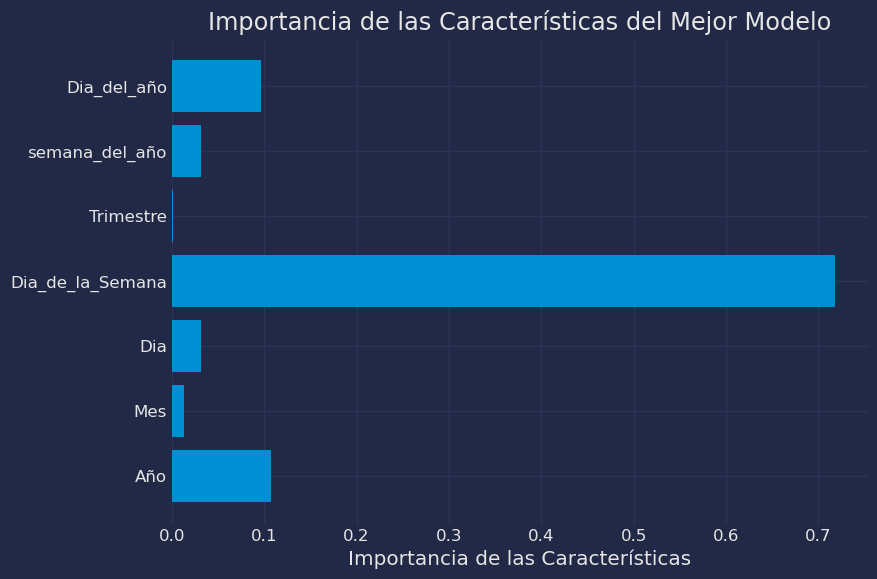

In [ ]:

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importancia de las Características')
plt.title('Importancia de las Características del Mejor Modelo')
plt.show()


In [ ]:
rfrt = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_leaf=4, min_samples_split=10)
rfrt.fit(X_train, y_train)

fcst = rfrt.predict(X_test)

In [ ]:
fcst

array([13449.76531408, 13570.86847347, 14823.67042252,  7594.97308725,
        2431.52264386, 11742.12546945, 22606.77476924, 13459.55873616,
       13451.93313446, 14543.81005098,  7477.03966145,  2345.78375672,
       11515.75879236, 22399.05434673, 12824.83654337, 12692.09505313])

In [ ]:
test_data['Random_predictions'] = fcst

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\915175415.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_data

,Total,Arima_Predictions,LSTM_Predictions,Random_predictions
Fecha,,,,
2023-10-18,5523.89,11197.635723,7567.396274,13449.765314
2023-10-19,6444.92,11398.901300,3452.302040,13570.868473
2023-10-20,11074.20,13142.574433,2066.190314,14823.670423
2023-10-21,5698.29,7036.645085,7201.281092,7594.973087
2023-10-22,2095.71,2664.951748,16379.675731,2431.522644
2023-10-23,7500.55,11199.020496,8599.669021,11742.125469
2023-10-24,16400.65,21206.017186,7925.384883,22606.774769
2023-10-25,8367.00,11691.645780,7690.606371,13459.558736
2023-10-26,9727.16,11447.634387,3491.053432,13451.933134


In [ ]:
fig = px.line(test_data, x=test_data.index, y =['Random_predictions','Total'], template='plotly_dark', title='Predicciones con el modelo de Random Forest')
fig.show()

In [ ]:
evaluacion_metricas(test_data['Total'], test_data['Random_predictions'])

Evaluación de las metricas resultados:-
MSE es: 25362732.66576133
MAE es: 4563.508140952418
RMSE es: 5036.142637551217
MAPE es: 65.98156065415324
R^2 es: -0.41846046233047085



### XGBoost Modelo

In [ ]:
refunds2 = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
refunds2['Fecha'] = pd.to_datetime(refunds2['Fecha'])
refunds2 = refunds2.set_index('Fecha')
refunds2 = create_feature(refunds2)
refunds2 = refunds2.drop(['Amazon','eBay','Shopify','Walmart', 'Google'], axis= 1)
refunds2.head()

,Total,Año,Mes,Dia,Dia_de_la_Semana,Trimestre,semana_del_año,Dia_del_año
Fecha,,,,,,,,
2020-01-01,421.27,2020,1,1,2,1,1,1
2020-01-02,5546.81,2020,1,2,3,1,1,2
2020-01-03,7327.57,2020,1,3,4,1,1,3
2020-01-04,2726.78,2020,1,4,5,1,1,4
2020-01-05,1101.16,2020,1,5,6,1,1,5


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

tss = TimeSeriesSplit(n_splits=5, test_size= 16, gap =7)
tss

TimeSeriesSplit(gap=7, max_train_size=None, n_splits=5, test_size=16)

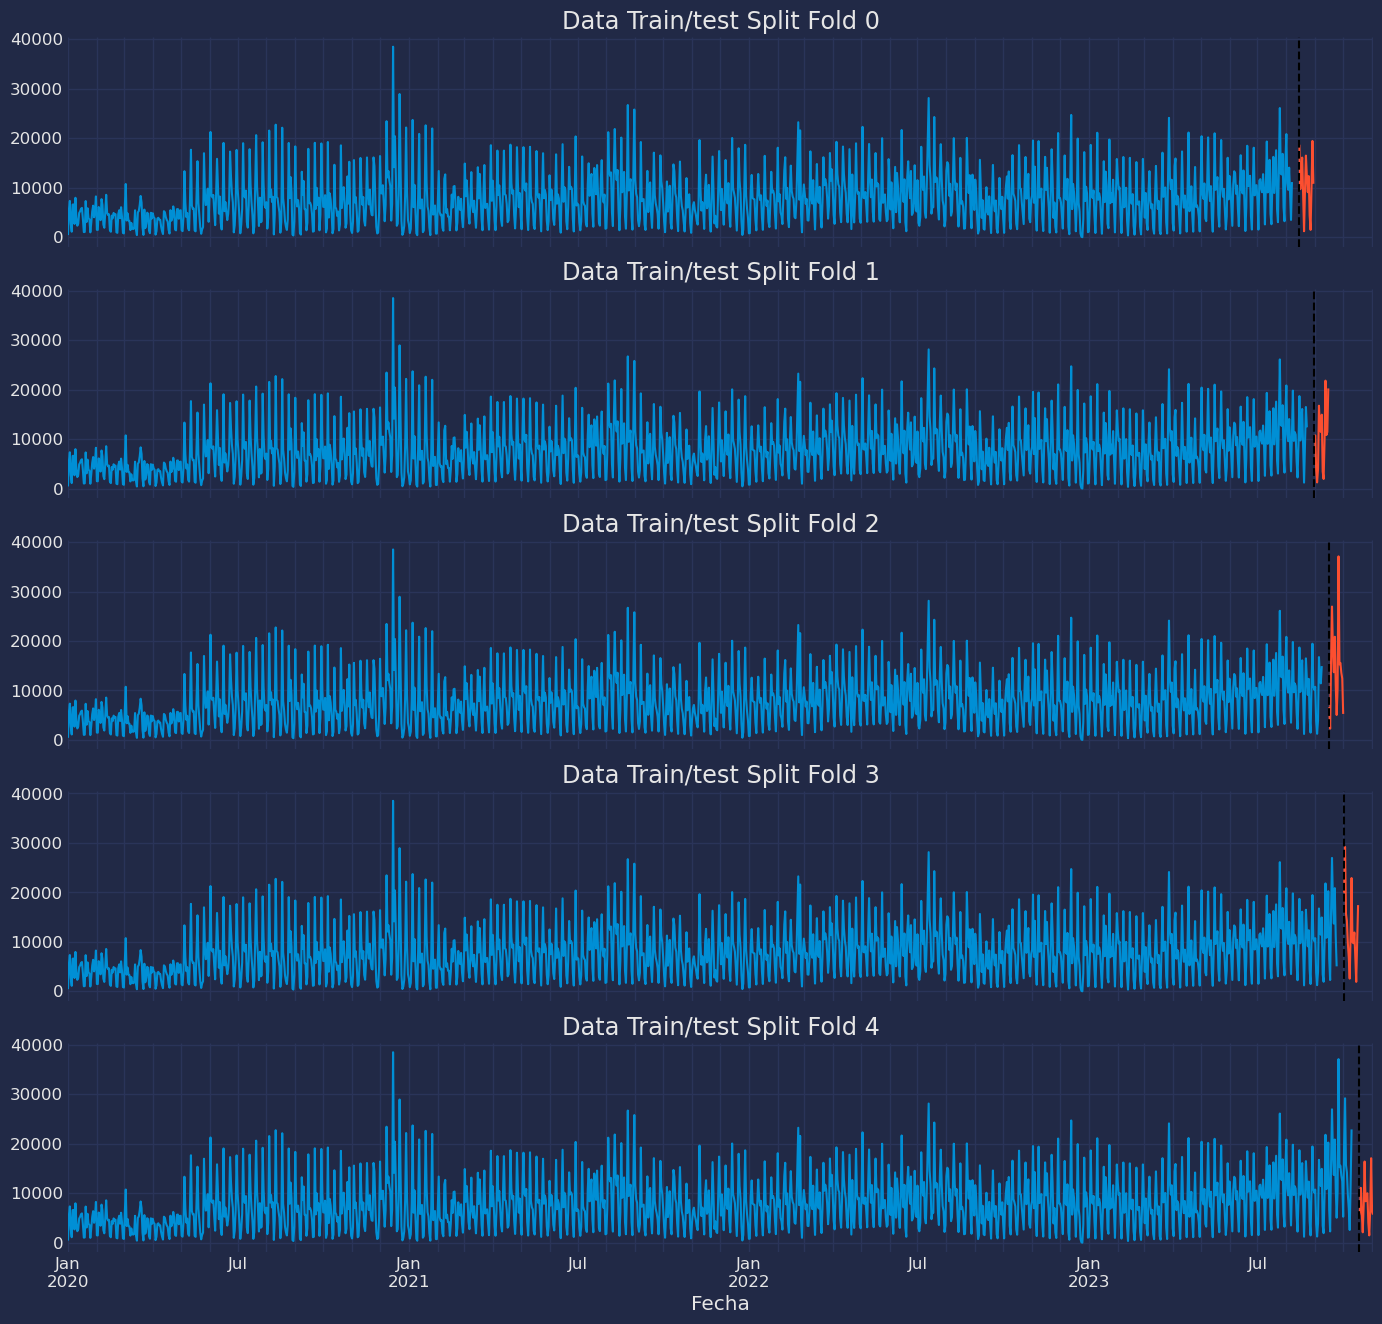

In [ ]:
fig, axs = plt.subplots(5,1,figsize =(15,15), sharex=True)
fold = 0

for train_idx, val_idx in tss.split(refunds2):
    train_1 = refunds2.iloc[train_idx]
    test_1 = refunds2.iloc[val_idx]
    train_1['Total'].plot(ax=axs[fold], 
                          label = 'Training Set',
                          title = f'Data Train/test Split Fold {fold}')
    test_1['Total'].plot(ax=axs[fold], 
                          label = 'Test Set')
    axs[fold].axvline(test_1.index.min(), color ='black', ls='--')
    fold +=1
plt.show()

### Forecast Horizon

In [ ]:
def create_feature(df):
    df = df.copy()  

    df['Año'] = df.index.year
    df['Mes'] = df.index.month
    df['Dia'] = df.index.day
    df['Dia_de_la_Semana'] = df.index.dayofweek
    df['Trimestre'] = df.index.quarter
    df['semana_del_año'] = df.index.isocalendar().week
    df['Dia_del_año'] = df.index.dayofyear
    return df
refunds2 = create_feature(refunds2)

### Lag Feature

In [ ]:
def add_lags(df):
    target_map = df.Total.to_dict()
    df['lag1'] = (df.index - pd.Timedelta('16 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('32 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('48 days')).map(target_map)
    return df

In [ ]:
refunds2 = add_lags(refunds2)

In [ ]:
refunds2.tail()

,Total,Año,Mes,Dia,Dia_de_la_Semana,Trimestre,semana_del_año,Dia_del_año,lag1,lag2,lag3
Fecha,,,,,,,,,,,
2023-10-29,1469.72,2023,10,29,6,4,43,302,11885.92,15267.88,9603.99
2023-10-30,6521.61,2023,10,30,0,4,44,303,6995.88,15570.61,21808.02
2023-10-31,17071.63,2023,10,31,1,4,44,304,1901.85,13580.25,10820.29
2023-11-01,6341.08,2023,11,1,2,4,44,305,9878.18,12404.48,11436.21
2023-11-02,5676.83,2023,11,2,3,4,44,306,17424.09,5250.18,20236.70


In [ ]:
### Entrenamiento

tss = TimeSeriesSplit(n_splits=5, test_size= 16, gap =7)
refunds2 = refunds2.sort_index()

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(refunds2):
    train_1 = refunds2.iloc[train_idx]
    test_1 = refunds2.iloc[val_idx]

    train_1 = create_feature(train_1)
    test_1 = create_feature(test_1)

    Feature = ['Año', 'Mes', 'Dia', 'Dia_de_la_Semana', 'Trimestre',
       'semana_del_año', 'Dia_del_año','lag1','lag2','lag3']
    Target = 'Total'

    X_train = train_1[Feature]
    y_train = train_1[Target]

    X_test = test_1[Feature]
    y_test = test_1[Target]

    X_train = X_train.astype(float)
    y_train = y_train.astype(float)
    X_test = X_test.astype(float)
    y_test = y_test.astype(float)

    
reg = xgb.XGBRegressor(base_score = 0.5, booster = 'gbtree', n_estimators = 1000, 
                        early_stopping_rounds = 50, objective = 'reg:linear', 
                        max_depth = 3, learning_rate = 0.1)

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 100)

xgb_predictions = reg.predict(X_test)
preds.append(xgb_predictions)
score = np.sqrt(mean_squared_error(y_test, xgb_predictions))
scores.append(score)

[13:44:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8768.65895	validation_1-rmse:7892.17571
[65]	validation_0-rmse:2431.93618	validation_1-rmse:4901.06750


In [ ]:
xgb_predictions

array([ 8317.195 ,  7903.1357,  8650.393 ,  3579.6348,  2093.6394,
        7890.335 , 14864.963 ,  8832.55  ,  7903.1357,  8650.393 ,
        3579.6348,  2271.4377,  7648.2646, 14864.963 ,  8832.55  ,
        7631.6406], dtype=float32)

In [ ]:
scores

[1679.265425580927]

In [ ]:
### Predicting the future
refunds2 = create_feature(refunds2)

Feature = ['Año', 'Mes', 'Dia', 'Dia_de_la_Semana', 'Trimestre',
       'semana_del_año', 'Dia_del_año','lag1','lag2','lag3']
Target = 'Total'

X_all = refunds2[Feature]
y_all = refunds2[Target]


reg = xgb.XGBRegressor(base_score = 0.5, booster = 'gbtree', n_estimators = 500, 
                        early_stopping_rounds = 50, objective = 'reg:linear', 
                        max_depth = 3, learning_rate = 0.1)

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 100)

[13:44:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8768.65895	validation_1-rmse:7892.17571


[65]	validation_0-rmse:2431.93618	validation_1-rmse:4901.06750


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
refunds2.index.max()

Timestamp('2023-11-02 00:00:00')

In [ ]:
# Fechas a predecir

future = pd.date_range('2023-10-18','2023-11-02', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
refunds2['isFuture'] = False
df_and_future = pd.concat([refunds2, future_df])
df_and_future = create_feature(df_and_future)
df_and_future = add_lags(df_and_future)

NameError: name 'refunds2' is not defined

In [ ]:
future_w_feature =df_and_future.query('isFuture').copy()

In [ ]:
#Prediction 

future_w_feature['pred']= reg.predict(future_w_feature[Feature].astype(float))

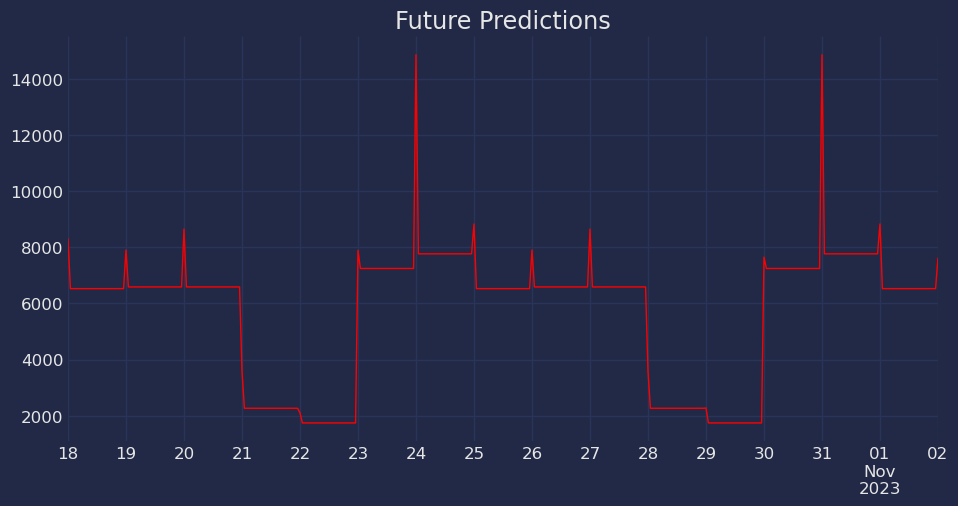

In [ ]:
future_w_feature['pred'].plot(figsize=(10,5),
                              color = 'red',
                              ms = 1,
                              lw = 1,
                              title ='Future Predictions')
plt.show()

In [ ]:
future_w_feature['pred']

2023-10-18 00:00:00    8317.195312
2023-10-18 01:00:00    6527.321777
2023-10-18 02:00:00    6527.321777
2023-10-18 03:00:00    6527.321777
2023-10-18 04:00:00    6527.321777
                          ...     
2023-11-01 20:00:00    6527.321777
2023-11-01 21:00:00    6527.321777
2023-11-01 22:00:00    6527.321777
2023-11-01 23:00:00    6527.321777
2023-11-02 00:00:00    7631.640625
Name: pred, Length: 361, dtype: float32

In [ ]:
test_data['xgb_boost 2'] = future_w_feature['pred']

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\3755162603.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_data['xgb_boost 2']

Fecha
2023-10-18     8317.195312
2023-10-19     7903.135742
2023-10-20     8650.392578
2023-10-21     3579.634766
2023-10-22     2093.639404
2023-10-23     7890.334961
2023-10-24    14864.962891
2023-10-25     8832.549805
2023-10-26     7903.135742
2023-10-27     8650.392578
2023-10-28     3579.634766
2023-10-29     2271.437744
2023-10-30     7648.264648
2023-10-31    14864.962891
2023-11-01     8832.549805
2023-11-02     7631.640625
Freq: D, Name: xgb_boost 2, dtype: float32

In [ ]:
evaluacion_metricas(test_data['Total'], test_data['xgb_boost 2'])

Evaluación de las metricas resultados:-
MSE es: 2819932.369551492
MAE es: 1460.1620642089842
RMSE es: 1679.265425580927
MAPE es: 22.124534867588405
R^2 es: 0.8422897632771859



In [ ]:
train = refunds2[:len(refunds) -16]
test = refunds2[len(refunds)-16:]
train = create_feature(train)
test = create_feature(test)

Feature = ['Año', 'Mes', 'Dia', 'Dia_de_la_Semana', 'Trimestre',
       'semana_del_año', 'Dia_del_año']
Target = 'Total'

X_train = train[Feature]
y_train = train[Target]

X_test = test[Feature]
y_test = test[Target]
X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)

In [ ]:
import xgboost as xgb

reg = xgb.XGBRegressor(base_score = 0.5, booster = 'gbtree', n_estimators = 1000, 
                        early_stopping_rounds = 50, objective = 'reg:linear', 
                        max_depth = 3, learning_rate = 0.1)

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 100)

[13:45:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8750.28816	validation_1-rmse:7894.44314


[67]	validation_0-rmse:2536.66444	validation_1-rmse:4842.22342


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
fi = pd.DataFrame(data = reg.feature_importances_, index = reg.feature_names_in_, columns = ['importance'])

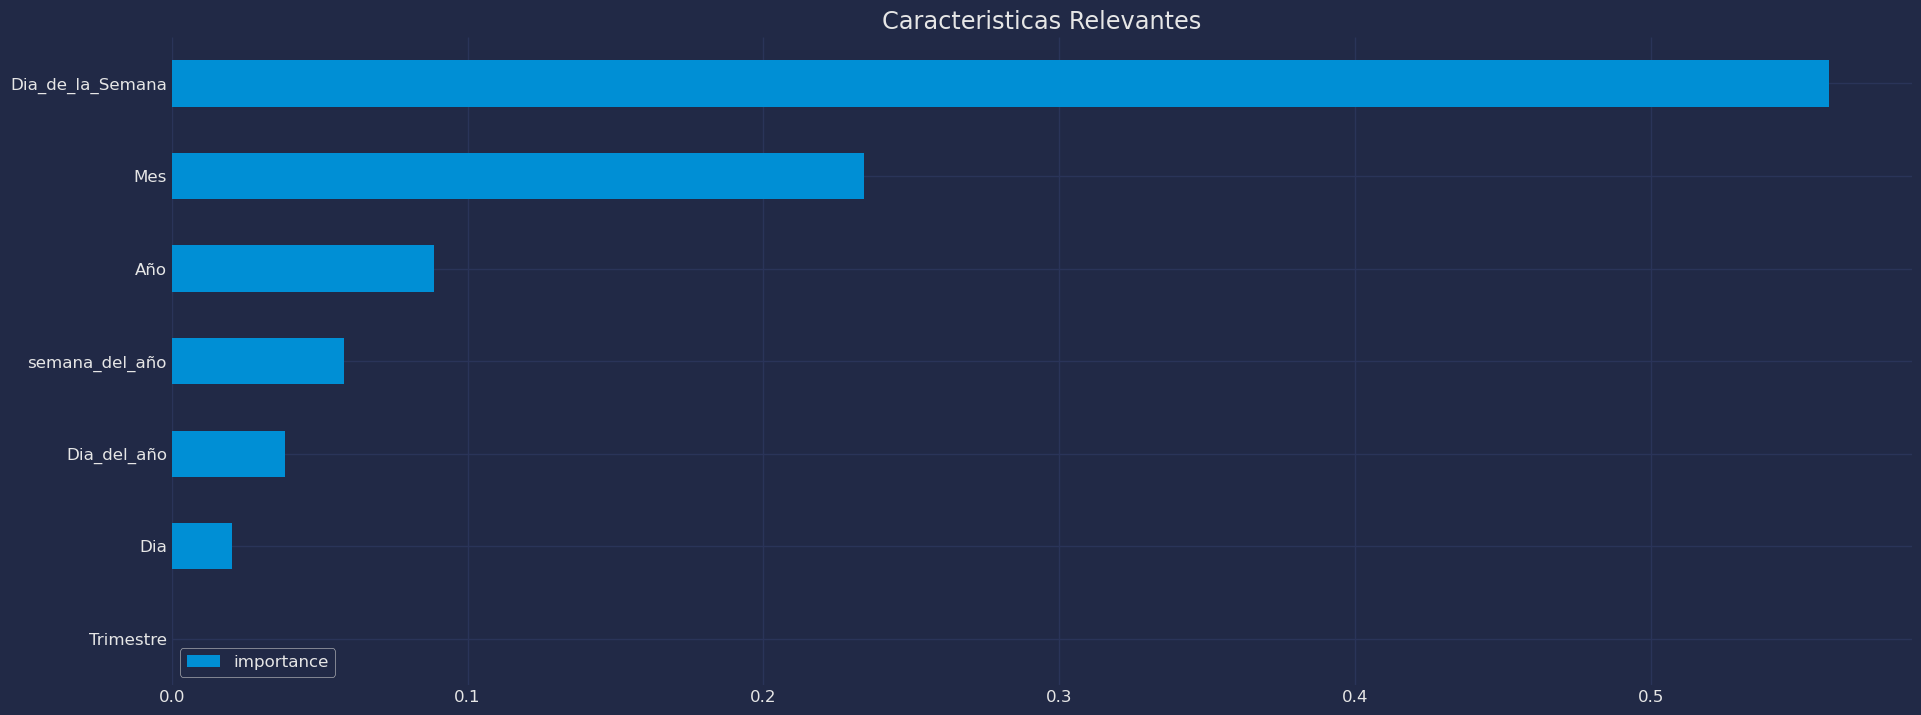

In [ ]:
fi.sort_values('importance').plot(kind = 'barh', title = 'Caracteristicas Relevantes')
plt.show()

In [ ]:
xgb_predictions = reg.predict(X_test)

In [ ]:
test_data['XGBoost_Predictions'] = xgb_predictions

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\4131739282.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.line(test_data, x=test_data.index, y =['XGBoost_Predictions','Total'], template='plotly_dark', title='Predicciones con el modelo de XGBoost')
fig.show()

In [ ]:
evaluacion_metricas(test_data['Total'], test_data['XGBoost_Predictions'])

Evaluación de las metricas resultados:-
MSE es: 3564475.1099992525
MAE es: 1547.5808666992186
RMSE es: 1887.9817557379235
MAPE es: 23.05631634247609
R^2 es: 0.8006497533556199



### Prophet modelo

In [ ]:
from prophet import Prophet

In [ ]:
refunds2 = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
refunds2.head()

,Fecha,Amazon,eBay,Shopify,Walmart,Google,Total
0,2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
1,2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2,2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
3,2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
4,2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
refunds2['Fecha'] = pd.to_datetime(refunds2['Fecha'])
refunds2 = refunds2.set_index('Fecha')
refunds2 = refunds2.drop(['Amazon','eBay','Shopify','Walmart', 'Google'], axis= 1)
refunds2.head()

,Total
Fecha,
2020-01-01,421.27
2020-01-02,5546.81
2020-01-03,7327.57
2020-01-04,2726.78
2020-01-05,1101.16


In [ ]:
refunds2 = refunds2.reset_index()
profe = refunds2.rename(columns={'Fecha':'ds', 'Total':'y'})
profe.head()

,ds,y
0,2020-01-01,421.27
1,2020-01-02,5546.81
2,2020-01-03,7327.57
3,2020-01-04,2726.78
4,2020-01-05,1101.16


In [ ]:
train_data_profe = profe.iloc[:len(refunds2)-16]
test_data_profe = profe.iloc[len(refunds2)-16:]

In [ ]:
m = Prophet()
m.fit(train_data_profe)

16:27:29 - cmdstanpy - INFO - Chain [1] start processing
16:27:30 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods = 16, freq='D')
prophet_pred = m.predict(future)


In [ ]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1397,2023-10-29,10856.927812,366.819813,7904.944836,10856.919368,10856.927812,-6673.256331,-6673.256331,-6673.256331,-6083.249762,-6083.249762,-6083.249762,-590.006569,-590.006569,-590.006569,0.0,0.0,0.0,4183.671481
1398,2023-10-30,10865.785991,6368.606263,13819.099401,10865.532552,10865.785991,-883.411609,-883.411609,-883.411609,-367.631503,-367.631503,-367.631503,-515.780106,-515.780106,-515.780106,0.0,0.0,0.0,9982.374382
1399,2023-10-31,10874.644169,15502.891171,22520.413131,10874.243365,10874.650805,8113.739249,8113.739249,8113.739249,8559.143796,8559.143796,8559.143796,-445.404547,-445.404547,-445.404547,0.0,0.0,0.0,18988.383418
1400,2023-11-01,10883.502347,7930.160732,15135.471577,10882.814188,10883.618977,503.868124,503.868124,503.868124,885.095311,885.095311,885.095311,-381.227187,-381.227187,-381.227187,0.0,0.0,0.0,11387.370471
1401,2023-11-02,10892.360526,7395.894366,14500.834453,10891.202803,10892.644104,-39.024724,-39.024724,-39.024724,286.300318,286.300318,286.300318,-325.325043,-325.325043,-325.325043,0.0,0.0,0.0,10853.335801


In [ ]:
prophet_pred2 = pd.DataFrame({'Date': prophet_pred[-16:]['ds'], 'Pred':prophet_pred[-16:]['yhat']})

In [ ]:
prophet_pred2 = prophet_pred2.set_index('Date')

In [ ]:
prophet_pred2.index.freq ='D'

In [ ]:
prophet_pred2

,Pred
Date,
2023-10-18,10695.858279
2023-10-19,10066.968107
2023-10-20,10478.000659
2023-10-21,5785.068502
2023-10-22,3713.141840
2023-10-23,9466.417115
2023-10-24,18444.525003
2023-10-25,10833.422418
2023-10-26,10306.848886


In [ ]:
test_data['Prophet_predictions'] = prophet_pred2['Pred'].values

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\3428479106.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_data

,Total,Arima_Predictions,LSTM_Predictions,Random_predictions,Prophet_predictions
Fecha,,,,,
2023-10-18,5523.89,11197.635723,7343.409209,12155.91372,10695.858279
2023-10-19,6444.92,11398.901300,3561.172306,12149.44062,10066.968107
2023-10-20,11074.20,13142.574433,1695.078423,14628.61844,10478.000659
2023-10-21,5698.29,7036.645085,7993.293548,7872.70236,5785.068502
2023-10-22,2095.71,2664.951748,17285.290970,2770.96644,3713.141840
2023-10-23,7500.55,11199.020496,9065.194025,11563.78404,9466.417115
2023-10-24,16400.65,21206.017186,7706.543405,24222.39914,18444.525003
2023-10-25,8367.00,11691.645780,9342.261125,11949.30082,10833.422418
2023-10-26,9727.16,11447.634387,4003.582043,11865.01002,10306.848886


In [ ]:
fig = px.line(test_data, x=test_data.index, y =['Prophet_predictions','Total'], template='plotly_dark', title='Predicciones con el modelo de Prophet')
fig.show()

In [ ]:
evaluacion_metricas(test_data['Total'], test_data['Prophet_predictions'])

Evaluación de las metricas resultados:-
MSE es: 8624814.52853215
MAE es: 2466.67023792888
RMSE es: 2936.8034541882694
MAPE es: 49.38187199173161
R^2 es: 0.5176403676654437



In [ ]:
fig = px.line(test_data, x = test_data.index, y= test_data.columns, template='plotly_dark',
title = 'Predicciones')
fig.show()

### Chatgpt model

Epoch 1/50
35/35 [==============================] - 1s 5ms/step - loss: 0.0325
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 8/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 10/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 11/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 12/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0173
Epoch 13/50
35/35 [==============================

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

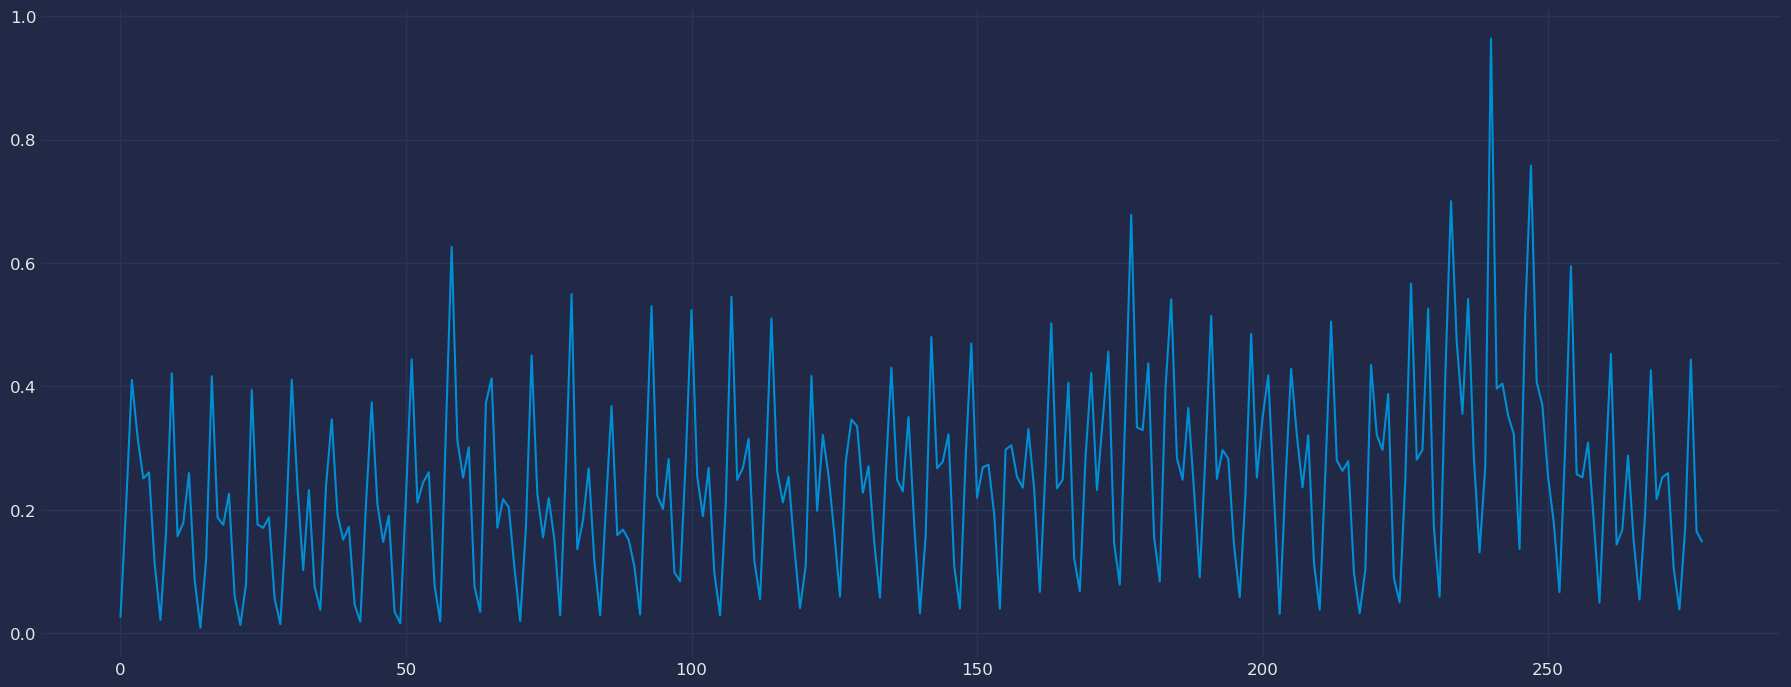

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt

# Leer tus datos
data = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
data = data.drop(['Amazon', 'eBay', 'Shopify', 'Walmart', 'Google'], axis=1)

# Asegurarse de que los datos estén ordenados por fecha
data['Fecha'] = pd.to_datetime(data['Fecha'])
data = data.sort_values(by='Fecha')
data.set_index('Fecha', inplace=True)

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
data['Total'] = scaler.fit_transform(data['Total'].values.reshape(-1, 1))

# Crear secuencias de datos para entrenamiento
sequence_length = 16  # Longitud de la secuencia de tiempo
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data['Total'].values[i:i+sequence_length])
    y.append(data['Total'].values[i+sequence_length])

X, y = np.array(X), np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Realizar predicciones para los próximos 16 días
last_sequence = X_test[-1]

predictions_16_days = []
for i in range(16):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predictions_16_days.append(prediction[0, 0])
    last_sequence = np.roll(last_sequence, shift=-1)
    last_sequence[-1] = prediction

# Desnormalizar las predicciones
predictions_16_days = scaler.inverse_transform(np.array(predictions_16_days).reshape(-1, 1))

# Imprimir las predicciones para los próximos 16 días
print("Predicciones para los próximos 16 días:")
print(predictions_16_days)

plt.plot(y_test, label='Datos reales')
plt.plot(np.concatenate(([y_test[-1]], predictions_16_days)), label='Predicciones')
plt.legend()
plt.show()



In [ ]:
predictions_16_days

array([[ 7930.1763],
       [ 7027.3643],
       [ 4617.935 ],
       [ 2594.9753],
       [ 4036.8113],
       [17145.084 ],
       [ 9972.623 ],
       [ 7983.688 ],
       [ 6837.963 ],
       [ 4390.0244],
       [ 1996.0465],
       [ 5326.6455],
       [17740.63  ],
       [ 9840.137 ],
       [ 7637.6597],
       [ 6142.2197]], dtype=float32)

In [ ]:
test_data['Gpt_model'] = predictions_16_days

C:\Users\javij\AppData\Local\Temp\ipykernel_51756\1841852402.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.line(test_data, x = test_data.index, y= test_data.columns, template='plotly_dark',
title = 'Predicciones')
fig.show()

In [ ]:
evaluacion_metricas(test_data['Total'], test_data['Gpt_model'])

Evaluación de las metricas resultados:-
MSE es: 27145161.71515356
MAE es: 4094.8762240600586
RMSE es: 5210.101891052953
MAPE es: 66.99145333766681
R^2 es: -0.5181462953513456



### Predicion con Red Neuronal usando categorias

In [ ]:
# Leer tus datos
df = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
df.head()

,Fecha,Amazon,eBay,Shopify,Walmart,Google,Total
0,2020-01-01,421.27,NaN,NaN,NaN,NaN,421.27
1,2020-01-02,5546.81,NaN,NaN,NaN,NaN,5546.81
2,2020-01-03,7327.57,NaN,NaN,NaN,NaN,7327.57
3,2020-01-04,2726.78,NaN,NaN,NaN,NaN,2726.78
4,2020-01-05,1101.16,NaN,NaN,NaN,NaN,1101.16


In [ ]:
df = df[['Fecha', 'Total']]
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')

In [ ]:
def create_feature(df):
    df = df.copy()  

    df['Año'] = df.index.year
    df['Mes'] = df.index.month
    df['Dia'] = df.index.day
    df['Dia_de_la_Semana'] = df.index.dayofweek
    df['Trimestre'] = df.index.quarter
    df['semana_del_año'] = df.index.isocalendar().week
    df['Dia_del_año'] = df.index.dayofyear
    return df
df= create_feature(df)

In [ ]:
def add_lags(df):
    target_map = df.Total.to_dict()
    df['lag1'] = (df.index - pd.Timedelta('16 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('32 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('48 days')).map(target_map)
    return df

df = add_lags(df)

In [ ]:
df.head()

,Total,Año,Mes,Dia,Dia_de_la_Semana,Trimestre,semana_del_año,Dia_del_año,lag1,lag2,lag3
Fecha,,,,,,,,,,,
2020-01-01,421.27,2020,1,1,2,1,1,1,NaN,NaN,NaN
2020-01-02,5546.81,2020,1,2,3,1,1,2,NaN,NaN,NaN
2020-01-03,7327.57,2020,1,3,4,1,1,3,NaN,NaN,NaN
2020-01-04,2726.78,2020,1,4,5,1,1,4,NaN,NaN,NaN
2020-01-05,1101.16,2020,1,5,6,1,1,5,NaN,NaN,NaN


In [ ]:
df.tail()

,Total,Año,Mes,Dia,Dia_de_la_Semana,Trimestre,semana_del_año,Dia_del_año,lag1,lag2,lag3
Fecha,,,,,,,,,,,
2023-10-29,1469.72,2023,10,29,6,4,43,302,11885.92,15267.88,9603.99
2023-10-30,6521.61,2023,10,30,0,4,44,303,6995.88,15570.61,21808.02
2023-10-31,17071.63,2023,10,31,1,4,44,304,1901.85,13580.25,10820.29
2023-11-01,6341.08,2023,11,1,2,4,44,305,9878.18,12404.48,11436.21
2023-11-02,5676.83,2023,11,2,3,4,44,306,17424.09,5250.18,20236.70


In [ ]:
df['lag1'].fillna(0, inplace=True)
df['lag2'].fillna(0, inplace=True)
df['lag3'].fillna(0, inplace=True)

In [ ]:
df.shape

(1402, 11)

In [ ]:
train_size = len(df) - 16
test_size = len(df) - train_size

train_datos, test_datos = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(train_datos.shape, test_datos.shape)

(1386, 11) (16, 11)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_datos)
scaled_test = scaler.transform(test_datos)

# Crear un nuevo MinMaxScaler para la característica 'Total'
scaler_total = MinMaxScaler(feature_range=(0, 1))
scaler_total.fit_transform(train_datos[['Total']])

# Crear la red LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(train_datos.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
x_train = scaled_train.reshape(scaled_train.shape[0], scaled_train.shape[1], 1)
y_train = scaled_train[:, 0]
model.fit(x_train, y_train, epochs=10, verbose=1)






Epoch 1/10
44/44 [==============================] - 1s 5ms/step - loss: 0.0281
Epoch 2/10
44/44 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 3/10
44/44 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 4/10
44/44 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 5/10
44/44 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 6/10
44/44 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 8/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 9/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 10/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0011


In [ ]:
# Predecir los datos de prueba
x_test = scaled_test.reshape(scaled_test.shape[0], scaled_test.shape[1], 1)
predictions = model.predict(x_test)



1/1 [==============================] - 0s 91ms/step


In [ ]:
x_test[0]

array([[0.14347435],
       [1.        ],
       [0.81818182],
       [0.56666667],
       [0.33333333],
       [1.        ],
       [0.78846154],
       [0.79452055],
       [0.51736518],
       [0.1715137 ],
       [0.26296821]])

In [ ]:
scaled_train[50]

array([0.1156446 , 0.        , 0.09090909, 0.63333333, 0.5       ,
       0.        , 0.13461538, 0.1369863 , 0.1361301 , 0.02749209,
       0.19032209])

In [ ]:
# Transformar las predicciones de vuelta a la escala original
predictions = scaler_total.inverse_transform(predictions)


In [ ]:
predictions

array([[ 5078.0234],
       [ 6231.597 ],
       [ 8516.161 ],
       [ 2876.6719],
       [ 1310.4008],
       [ 6493.2905],
       [15779.002 ],
       [ 6828.353 ],
       [ 8308.976 ],
       [ 8208.262 ],
       [ 1827.5706],
       [  984.1249],
       [ 5098.1006],
       [17257.764 ],
       [ 5549.873 ],
       [ 5898.9297]], dtype=float32)

In [ ]:
test_data['LSTM 3'] = predictions

In [ ]:
fig = px.line(test_data, x = test_data.index, y= test_data.columns, template='plotly_dark',
title = 'Predicciones')
fig.show()

In [ ]:
evaluacion_metricas(test_data['Total'], test_data['LSTM 3'])

NameError: name 'test_data' is not defined

### Probando el modelo LSTM

In [ ]:
x_test

array([[[0.14347435],
        [1.        ],
        [0.81818182],
        [0.56666667],
        [0.33333333],
        [1.        ],
        [0.78846154],
        [0.79452055],
        [0.51736518],
        [0.1715137 ],
        [0.26296821]],

       [[0.16739665],
        [1.        ],
        [0.81818182],
        [0.6       ],
        [0.5       ],
        [1.        ],
        [0.78846154],
        [0.79726027],
        [0.75797053],
        [0.05907915],
        [0.27863616]],

       [[0.28763491],
        [1.        ],
        [0.81818182],
        [0.63333333],
        [0.66666667],
        [1.        ],
        [0.78846154],
        [0.8       ],
        [0.40724124],
        [0.41639323],
        [0.09792241]],

       [[0.14800411],
        [1.        ],
        [0.81818182],
        [0.66666667],
        [0.83333333],
        [1.        ],
        [0.78846154],
        [0.80273973],
        [0.36946367],
        [0.70012667],
        [0.03222419]],

       [[0.05443277],
  

In [ ]:
# Preparar los datos futuros
future = pd.date_range(df.index.max() + pd.DateOffset(1), periods=16, freq='D')
future_df = pd.DataFrame(index=future)
future_df = create_feature(future_df)
future_df = add_lags(future_df)




# Seleccionar las características
FEATURES = ['Año', 'Mes', 'Dia', 'Dia_de_la_Semana', 'Trimestre', 'semana_del_año', 'Dia_del_año', 'lag1', 'lag2', 'lag3']
future_w_features = future_df[FEATURES]

# Transformar los datos futuros
scaled_future_w_features = scaler.transform(future_w_features)
x_futuro = scaled_future_w_features.reshape(scaled_future_w_features.shape[0], len(FEATURES), 1)

# Hacer la predicción
predictions = model.predict(x_futuro)

# Transformar las predicciones de vuelta a la escala original
predictions = scaler_total.inverse_transform(predictions)

# Crear un dataframe con las predicciones
pred_df = pd.DataFrame(predictions, index=future, columns=['Prediccion'])
print(pred_df)


AttributeError: 'DataFrame' object has no attribute 'Total'

In [ ]:
# Fechas a predecir
future = pd.date_range('2023-10-18','2023-11-02', freq='1D')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_feature(df_and_future)
df_and_future = add_lags(df_and_future)
future_w_features = df_and_future.query('isFuture').copy()

FEATURES = ['Año','Mes','Dia', 'Dia_de_la_Semana', 'Trimestre',	'semana_del_año', 'Dia_del_año', 'lag1','lag2',	'lag3']
future_w_features = future_w_features[FEATURES]

scaler_test = MinMaxScaler(feature_range=(0, 1))

future_w_features = scaler_test.fit_transform(future_w_features)
#x_futuro = scaled_future_w_features.reshape(scaled_fechas_futuras.shape[0], scaled_fechas_futuras.shape[1], 1)
x_futuro = future_w_features.reshape(future_w_features.shape[0], future_w_features.shape[1], 1)
# Realizar la predicción
predictions = model.predict(x_futuro)

# Asignar las predicciones al dataframe
#future_w_feature['pred'] = predictions


1/1 [==============================] - 0s 140ms/step


In [ ]:
x_futuro

array([[[0.        ],
        [0.        ],
        [0.56666667],
        [0.33333333],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.66043674],
        [0.12428281],
        [0.43193925]],

       [[0.        ],
        [0.        ],
        [0.6       ],
        [0.5       ],
        [0.        ],
        [0.        ],
        [0.06666667],
        [1.        ],
        [0.        ],
        [0.46126873]],

       [[0.        ],
        [0.        ],
        [0.63333333],
        [0.66666667],
        [0.        ],
        [0.        ],
        [0.13333333],
        [0.50502022],
        [0.39496757],
        [0.12298321]],

       [[0.        ],
        [0.        ],
        [0.66666667],
        [0.83333333],
        [0.        ],
        [0.        ],
        [0.2       ],
        [0.45170522],
        [0.70860063],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.7       ],
        [1.        ],
        [0.        ],
  

In [ ]:
predictions = model.predict(x_futuro)
predictions = scaler_total.inverse_transform(predictions)
print(predictions)


1/1 [==============================] - 0s 24ms/step
[[1575.4269 ]
 [1161.7664 ]
 [1180.4641 ]
 [ 911.6898 ]
 [ 759.84717]
 [1731.9689 ]
 [1624.8296 ]
 [1460.2842 ]
 [1385.6172 ]
 [ 798.09564]
 [ 572.146  ]
 [ 466.009  ]
 [1023.4987 ]
 [ 450.6687 ]
 [2101.333  ]
 [2464.533  ]]


In [ ]:
predictions

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
future_w_feature['pred']

2023-10-18   NaN
2023-10-19   NaN
2023-10-20   NaN
2023-10-21   NaN
2023-10-22   NaN
2023-10-23   NaN
2023-10-24   NaN
2023-10-25   NaN
2023-10-26   NaN
2023-10-27   NaN
2023-10-28   NaN
2023-10-29   NaN
2023-10-30   NaN
2023-10-31   NaN
2023-11-01   NaN
2023-11-02   NaN
Name: pred, dtype: float32

In [ ]:
# Eliminar la columna 'isFuture' antes de transformar
df_and_future_scaled = df_and_future.drop(columns='isFuture')

# Asegúrate de que el scaler se ajuste a todas las columnas presentes en df_and_future_scaled
scaler.fit(df_and_future_scaled)
scaled_fechas_futuras = scaler.transform(df_and_future_scaled)

x_futuro = scaled_fechas_futuras.reshape(scaled_fechas_futuras.shape[0], scaled_fechas_futuras.shape[1], 1)
future_w_feature = df_and_future.query('isFuture').copy()

# Realizar la predicción
predictions = model.predict(x_futuro[df.shape[0]:])

# Asignar las predicciones al dataframe
future_w_feature['pred'] = predictions

# Graficar las predicciones
future_w_feature['pred'].plot(figsize=(10,5),
                              color = 'red',
                              ms = 1,
                              lw = 1,
                              title ='Future Predictions')
plt.show()
future_w_feature['pred']


In [ ]:
scaled_fechas_futuras

array([[0.01094182, 0.        , 0.        , ...,        nan,        nan,
               nan],
       [0.14406966, 0.        , 0.        , ...,        nan,        nan,
               nan],
       [0.19032209, 0.        , 0.        , ...,        nan,        nan,
               nan],
       ...,
       [       nan, 1.        , 0.81818182, ..., 0.04939756, 0.35272561,
        0.28104   ],
       [       nan, 1.        , 0.90909091, ..., 0.25657017, 0.32218684,
        0.29703755],
       [       nan, 1.        , 0.90909091, ..., 0.4525633 , 0.13636516,
        0.52561642]])

In [ ]:
df_and_future_scaled.tail()

,Total,Año,Mes,Dia,Dia_de_la_Semana,Trimestre,semana_del_año,Dia_del_año,lag1,lag2,lag3
2023-10-29,NaN,2023,10,29,6,4,43,302,11885.92,15267.88,9603.99
2023-10-30,NaN,2023,10,30,0,4,44,303,6995.88,15570.61,21808.02
2023-10-31,NaN,2023,10,31,1,4,44,304,1901.85,13580.25,10820.29
2023-11-01,NaN,2023,11,1,2,4,44,305,9878.18,12404.48,11436.21
2023-11-02,NaN,2023,11,2,3,4,44,306,17424.09,5250.18,20236.70


In [ ]:
future_w_feature =x_futuro.query('isFuture').copy()

In [ ]:
future_w_feature['pred']= model.predict(future_w_feature[Feature].astype(float))

In [ ]:
future_w_feature['pred'].plot(figsize=(10,5),
                              color = 'red',
                              ms = 1,
                              lw = 1,
                              title ='Future Predictions')
plt.show()

In [ ]:
future_w_feature['pred']

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Obtén la fecha de hoy
hoy = pd.Timestamp.now()

# Crea un DataFrame para las fechas futuras
fechas_futuras = pd.DataFrame(index=pd.date_range(start=hoy, periods=16), columns=df.columns)

# Llena las características
fechas_futuras = create_feature(fechas_futuras)
fechas_futuras = add_lags(fechas_futuras)

# Llena los valores faltantes
fechas_futuras.fillna(0, inplace=True)

# Normaliza los datos
scaled_fechas_futuras = scaler.transform(fechas_futuras)

# Predecir los datos futuros
x_futuro = scaled_fechas_futuras.reshape(scaled_fechas_futuras.shape[0], scaled_fechas_futuras.shape[1], 1)
predicciones_futuras = model.predict(x_futuro)

# Transformar las predicciones de vuelta a la escala original
predicciones_futuras = scaler_total.inverse_transform(predicciones_futuras)

# Añade las predicciones al DataFrame
fechas_futuras['Predicciones'] = predicciones_futuras


1/1 [==============================] - 0s 13ms/step


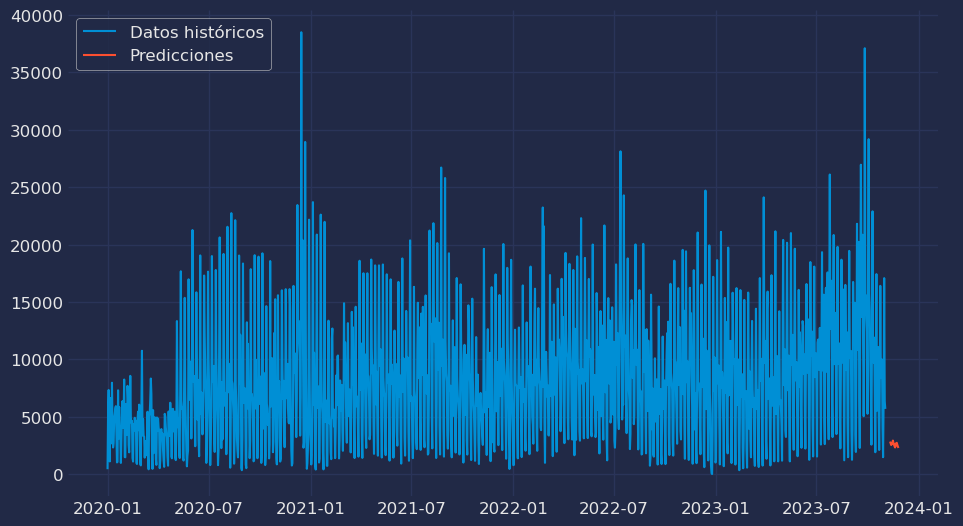

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Total'], label='Datos históricos')
plt.plot(fechas_futuras.index, fechas_futuras['Predicciones'], label='Predicciones')
plt.legend()
plt.show()


In [ ]:
print(fechas_futuras[['Predicciones']])


                            Predicciones
2023-11-10 15:43:43.830218   2830.044434
2023-11-11 15:43:43.830218   2672.273193
2023-11-12 15:43:43.830218   2528.748047
2023-11-13 15:43:43.830218   2688.659912
2023-11-14 15:43:43.830218   2617.420654
2023-11-15 15:43:43.830218   2919.291748
2023-11-16 15:43:43.830218   2713.633057
2023-11-17 15:43:43.830218   2561.061035
2023-11-18 15:43:43.830218   2426.817627
2023-11-19 15:43:43.830218   2315.538574
2023-11-20 15:43:43.830218   2655.750488
2023-11-21 15:43:43.830218   2494.919434
2023-11-22 15:43:43.830218   2723.207764
2023-11-23 15:43:43.830218   2548.243164
2023-11-24 15:43:43.830218   2398.753418
2023-11-25 15:43:43.830218   2273.079346


In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos
df = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
df = df[['Fecha', 'Total']]
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')

# Crear características
def create_feature(df):
    df = df.copy()  
    df['Año'] = df.index.year
    df['Mes'] = df.index.month
    df['Dia'] = df.index.day
    df['Dia_de_la_Semana'] = df.index.dayofweek
    df['Trimestre'] = df.index.quarter
    df['semana_del_año'] = df.index.isocalendar().week
    df['Dia_del_año'] = df.index.dayofyear
    return df

df = create_feature(df)

# Agregar lags
def add_lags(df):
    target_map = df.Total.to_dict()
    df['lag1'] = (df.index - pd.Timedelta('16 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('32 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('48 days')).map(target_map)
    return df

df = add_lags(df)

# Dividir los datos en entrenamiento y prueba
train_size = len(df) - 16
train_datos, test_datos = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Normalizar los datos
FEATURES = ['Año','Mes','Dia', 'Dia_de_la_Semana', 'Trimestre',	'semana_del_año', 'Dia_del_año', 'lag1',	'lag2',	'lag3']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_datos[FEATURES])
scaled_test = scaler.transform(test_datos[FEATURES])


# Normalizar los refunds
scaler_total = MinMaxScaler(feature_range=(0, 1))


# Entrenar el modelo
x_train = scaled_train.reshape(scaled_train.shape[0], len(FEATURES), 1)
y_train = scaler_total.fit_transform(train_datos[['Total']])
model.fit(x_train, y_train, epochs=10, verbose=1)
# Crear la red LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(len(FEATURES), 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
x_train = scaled_train.reshape(scaled_train.shape[0], len(FEATURES), 1)
model.fit(x_train, y_train, epochs=10, verbose=1)

# Preparar los datos futuros
future = pd.date_range(df.index.max() + pd.DateOffset(1), periods=16, freq='D')
future_df = pd.DataFrame(index=future)
future_df = create_feature(future_df)
future_df = add_lags(future_df)


# Seleccionar las características
future_w_features = future_df[FEATURES]

# Transformar los datos futuros
scaled_future_w_features = scaler.transform(future_w_features)
x_futuro = scaled_future_w_features.reshape(scaled_future_w_features.shape[0], len(FEATURES), 1)

# Hacer la predicción
predictions = model.predict(x_futuro)



predictions = scaler_total.inverse_transform(predictions)

# Crear un dataframe con las predicciones
pred_df = pd.DataFrame(predictions, index=future, columns=['Prediccion'])
print(pred_df)



Epoch 1/10
44/44 [==============================] - 1s 4ms/step - loss: nan
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 8/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 9/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 10/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 1/10
44/44 [==============================] - 1s 4ms/step - loss: nan
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 4/10


AttributeError: 'DataFrame' object has no attribute 'Total'

In [ ]:
predictions

array([[1575.4269 ],
       [1161.7664 ],
       [1180.4641 ],
       [ 911.6898 ],
       [ 759.84717],
       [1731.9689 ],
       [1624.8296 ],
       [1460.2842 ],
       [1385.6172 ],
       [ 798.09564],
       [ 572.146  ],
       [ 466.009  ],
       [1023.4987 ],
       [ 450.6687 ],
       [2101.333  ],
       [2464.533  ]], dtype=float32)

### Modelo sin normalizar

In [ ]:
df = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
df = df[['Fecha', 'Total']]
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')
def create_feature(df):
    df = df.copy()  

    df['Año'] = df.index.year
    df['Mes'] = df.index.month
    df['Dia'] = df.index.day
    df['Dia_de_la_Semana'] = df.index.dayofweek
    df['Trimestre'] = df.index.quarter
    df['semana_del_año'] = df.index.isocalendar().week
    df['Dia_del_año'] = df.index.dayofyear
    return df
df= create_feature(df)
def add_lags(df):
    target_map = df.Total.to_dict()
    df['lag1'] = (df.index - pd.Timedelta('16 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('32 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('48 days')).map(target_map)
    return df

df = add_lags(df)
df['lag1'].fillna(0, inplace=True)
df['lag2'].fillna(0, inplace=True)
df['lag3'].fillna(0, inplace=True)
train_size = len(df) - 16
test_size = len(df) - train_size

train_datos, test_datos = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(train_datos.shape, test_datos.shape)
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler


# Crear la red LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(train_datos.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Cargar los datos
df = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
df = df[['Fecha', 'Total']]
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')

# Crear características
def create_feature(df):
    df = df.copy()  
    df['Año'] = df.index.year
    df['Mes'] = df.index.month
    df['Dia'] = df.index.day
    df['Dia_de_la_Semana'] = df.index.dayofweek
    df['Trimestre'] = df.index.quarter
    df['semana_del_año'] = df.index.isocalendar().week
    df['Dia_del_año'] = df.index.dayofyear
    return df

df = create_feature(df)

# Añadir lags
def add_lags(df):
    target_map = df.Total.to_dict()
    df['lag1'] = (df.index - pd.Timedelta('16 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('32 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('48 days')).map(target_map)
    return df

df = add_lags(df)
df['lag1'].fillna(0, inplace=True)
df['lag2'].fillna(0, inplace=True)
df['lag3'].fillna(0, inplace=True)

# Dividir los datos en entrenamiento y prueba
train_size = len(df) - 16
test_size = len(df) - train_size
train_datos, test_datos = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_datos)
scaled_test = scaler.transform(test_datos)

# Crear el conjunto de datos
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Preparar los datos de entrenamiento y prueba
look_back = 16
x_train, y_train = create_dataset(scaled_train, look_back)
x_test, y_test = create_dataset(scaled_test, look_back)

# Remodelar la entrada para que sea [muestras, pasos de tiempo, características]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Crear la red LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(train_datos.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)


IndexError: tuple index out of range

### Evaluacion de los Modelos

In [ ]:
refunds = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
sales = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Ventas')
arima_proye =  pd.read_excel('Predicciones ventas y refunds mes de Diciembre 2023.xlsx', sheet_name='arima')
lstm_proye = pd.read_excel('Predicciones ventas y refunds mes de Diciembre 2023.xlsx', sheet_name='lstm', )
xgb_proye = pd.read_excel('Predicciones ventas y refunds mes de Diciembre 2023.xlsx', sheet_name='Xgboost')
pro_proye = pd.read_excel('Predicciones ventas y refunds mes de Diciembre 2023.xlsx', sheet_name='Prophet')




In [ ]:
arima_proye = arima_proye[arima_proye['Fecha']< '2024-01-02']
print(arima_proye['Refunds'].head())

0    13031.715800
1     6529.240165
2     2713.494840
3    10901.972677
4    20894.948400
Name: Refunds, dtype: float64


In [ ]:
refunds = refunds[refunds['Fecha'] >= '2023-12-01']


### Evaluacion Refunds

In [ ]:
evaluacion_metricas(arima_proye['Refunds'],refunds['Total'])

Evaluación de las metricas resultados:-
MSE es: 15766455.521566901
MAE es: 2933.2616975427873
RMSE es: 3970.6996262078173
MAPE es: 32.898965668731236
R^2 es: 0.4051118999328305



In [ ]:
evaluacion_metricas(lstm_proye['Refunds'],refunds['Total'])

Evaluación de las metricas resultados:-
MSE es: 20281084.10293939
MAE es: 3680.51036026001
RMSE es: 4503.452464825114
MAPE es: 36.01901366899428
R^2 es: -0.11045591897942142



In [ ]:
evaluacion_metricas(xgb_proye['Refunds'],refunds['Total'])

Evaluación de las metricas resultados:-
MSE es: 14545104.564193338
MAE es: 2838.460413513184
RMSE es: 3813.804473775935
MAPE es: 46.0515739710221
R^2 es: -0.3199049134560259



In [ ]:
evaluacion_metricas(pro_proye['Refunds'],refunds['Total'])

Evaluación de las metricas resultados:-
MSE es: 11017994.006872654
MAE es: 2569.4729108823226
RMSE es: 3319.336380494248
MAPE es: 32.54520388060264
R^2 es: 0.408415538809645



In [ ]:
refunds['arima'] = arima_proye['Refunds']
refunds['lstm'] = lstm_proye['Refunds']
refunds['xgb'] = xgb_proye['Refunds']
refunds['pro'] = pro_proye['Refunds']

In [ ]:
refunds

,Fecha,Amazon,eBay,Shopify,Google,Walmart,Total,arima,lstm,xgb,pro
1430,2023-12-01,7815.23,138.87,183.44,NaN,NaN,8137.54,NaN,NaN,NaN,NaN
1431,2023-12-02,4194.89,28.72,107.89,NaN,NaN,4331.50,NaN,NaN,NaN,NaN
1432,2023-12-03,1837.97,0.00,0,NaN,NaN,1837.97,NaN,NaN,NaN,NaN
1433,2023-12-04,6390.67,206.05,499.9,NaN,NaN,7096.62,NaN,NaN,NaN,NaN
1434,2023-12-05,9678.09,611.61,743.58,NaN,8773.66,19806.94,NaN,NaN,NaN,NaN
1435,2023-12-06,7525.49,175.31,1750.37,NaN,NaN,9451.17,NaN,NaN,NaN,NaN
1436,2023-12-07,12096.99,331.50,196.18,NaN,NaN,12624.67,NaN,NaN,NaN,NaN
1437,2023-12-08,3402.91,0.00,0,NaN,NaN,3402.91,NaN,NaN,NaN,NaN
1438,2023-12-09,9996.19,358.64,103.05,NaN,NaN,10457.88,NaN,NaN,NaN,NaN
1439,2023-12-10,1797.2,0.00,0,NaN,NaN,1797.20,NaN,NaN,NaN,NaN


In [ ]:
fig = px.line(refunds, x='Fecha', 
              y=[arima_proye['Refunds'], lstm_proye['Refunds'], xgb_proye['Refunds'], pro_proye['Refunds'], refunds['Total']], 
              template='plotly_dark',
              title='Predicciones Refunds',
              labels={'value': 'Refunds'},
              line_dash_sequence=['solid', 'solid', 'solid', 'solid', 'solid'],
              color_discrete_sequence=['blue', 'orange', 'green', 'red', 'purple'],
              )
              
fig.data[0].name = 'Arima'
fig.data[1].name = 'LSTM'
fig.data[2].name = 'XGBoost'
fig.data[3].name = 'Prophet'
fig.data[4].name = 'Real'

fig.show()



### Ventas Proyeccion

In [ ]:
sales = sales[sales['Fecha'] >= '2023-12-01']

In [ ]:
arima_proye = arima_proye[arima_proye['Fecha']< '2024-01-02']

In [ ]:
evaluacion_metricas(arima_proye['Venta'],sales['Total'])

Evaluación de las metricas resultados:-
MSE es: 4562386605.376293
MAE es: 59299.07896231895
RMSE es: 67545.44104065272
MAPE es: 41.021689882350266
R^2 es: -4.231680054771066



In [ ]:
evaluacion_metricas(lstm_proye['Venta'],sales['Total'])

Evaluación de las metricas resultados:-
MSE es: 3566731982.5959406
MAE es: 54176.597059375
RMSE es: 59722.12305834363
MAPE es: 32.746082496534626
R^2 es: -25.685021044333084



In [ ]:
evaluacion_metricas(xgb_proye['Ventas'],sales['Total'])

Evaluación de las metricas resultados:-
MSE es: 2984334262.9842453
MAE es: 46590.491669921874
RMSE es: 54629.06060865632
MAPE es: 30.092067438722044
R^2 es: -2.3516956192753424



In [ ]:
evaluacion_metricas(pro_proye['Venta'],sales['Total'])

Evaluación de las metricas resultados:-
MSE es: 2345800576.7486053
MAE es: 38466.35381277511
RMSE es: 48433.46546292765
MAPE es: 24.287417553313418
R^2 es: -1.033214557936383



In [ ]:
fig = px.line(refunds, x='Fecha', 
              y=[arima_proye['Venta'], lstm_proye['Venta'], xgb_proye['Ventas'], pro_proye['Venta'], sales['Total']], 
              template='plotly_dark',
              title='Predicciones Ventas',
              labels={'value': 'Refunds'},
              line_dash_sequence=['solid', 'solid', 'solid', 'solid', 'solid'],
              color_discrete_sequence=['blue', 'orange', 'green', 'red', 'purple'],
              )
              
fig.data[0].name = 'Arima'
fig.data[1].name = 'LSTM'
fig.data[2].name = 'XGBoost'
fig.data[3].name = 'Prophet'
fig.data[4].name = 'Real'

fig.show()